In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import os,sys
import glob
import numpy as np
import scipy
from scipy import interpolate
from scipy.optimize import curve_fit


plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12



In [7]:
tgt="H3"
files=sorted(glob.glob("./images/cal_layer_{}_?.csv".format(tgt)))
files=files+ sorted(glob.glob("./images/cal_layer_{}_??.csv".format(tgt)))


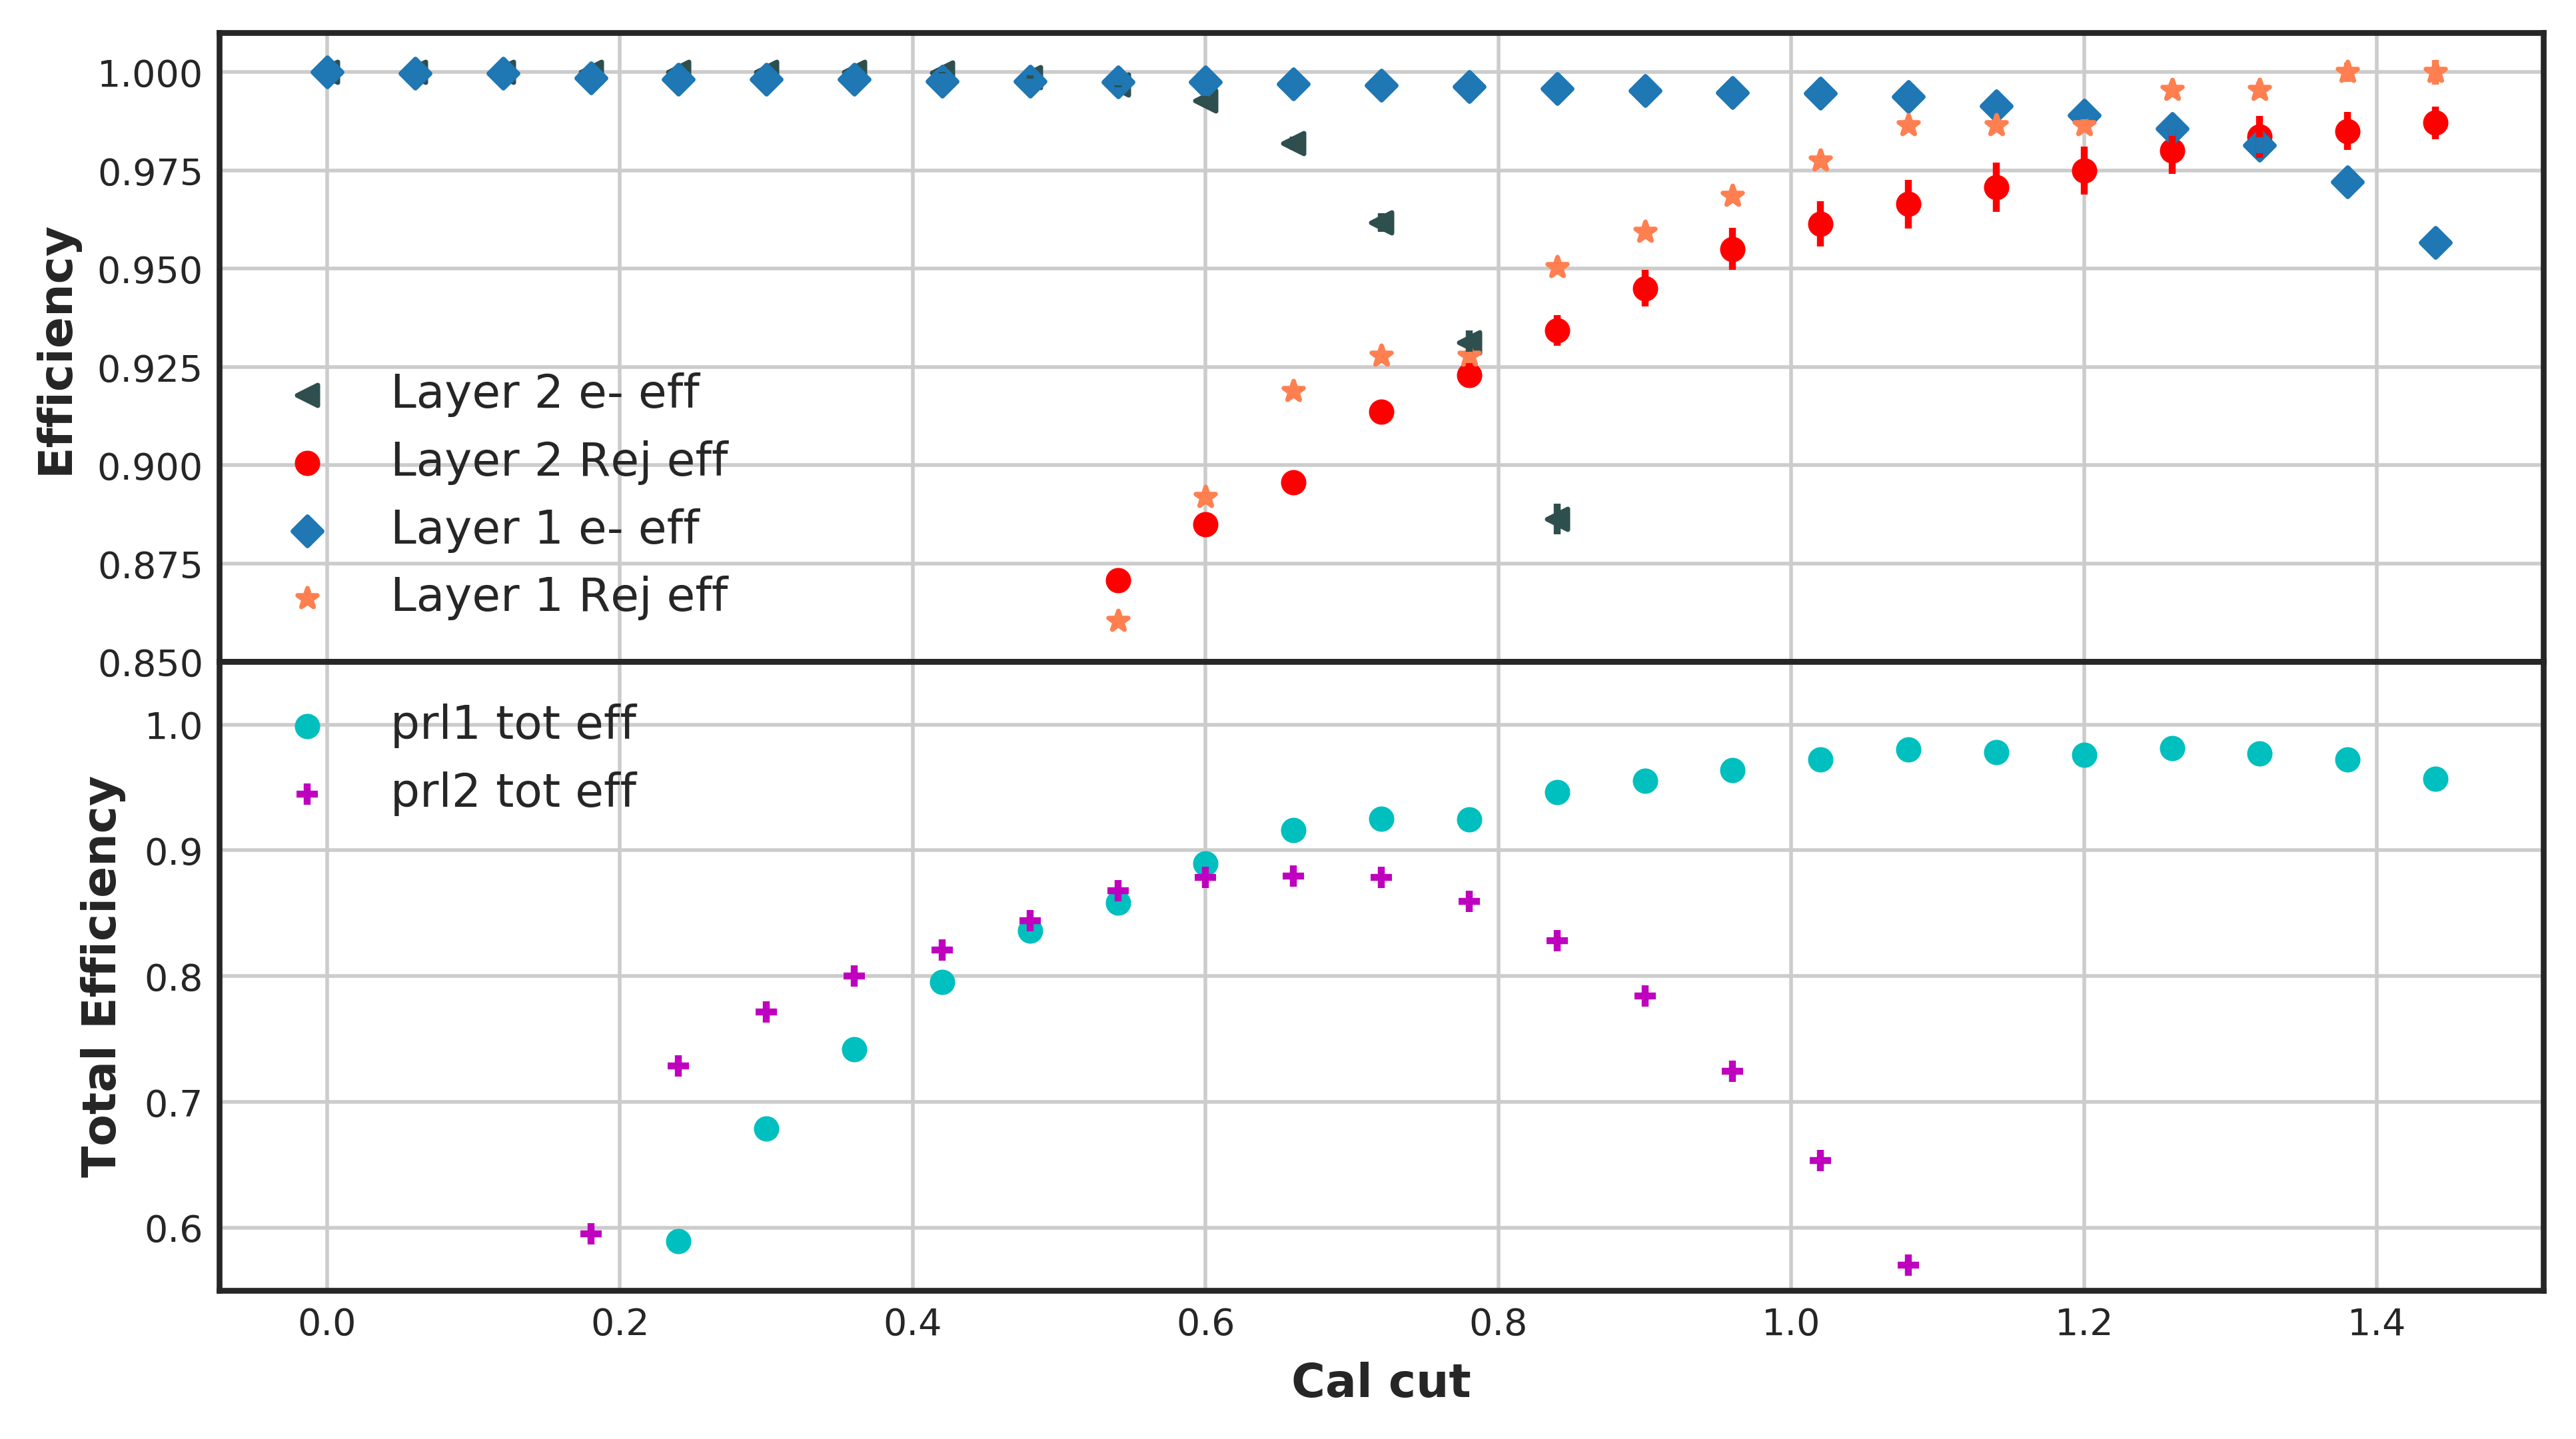

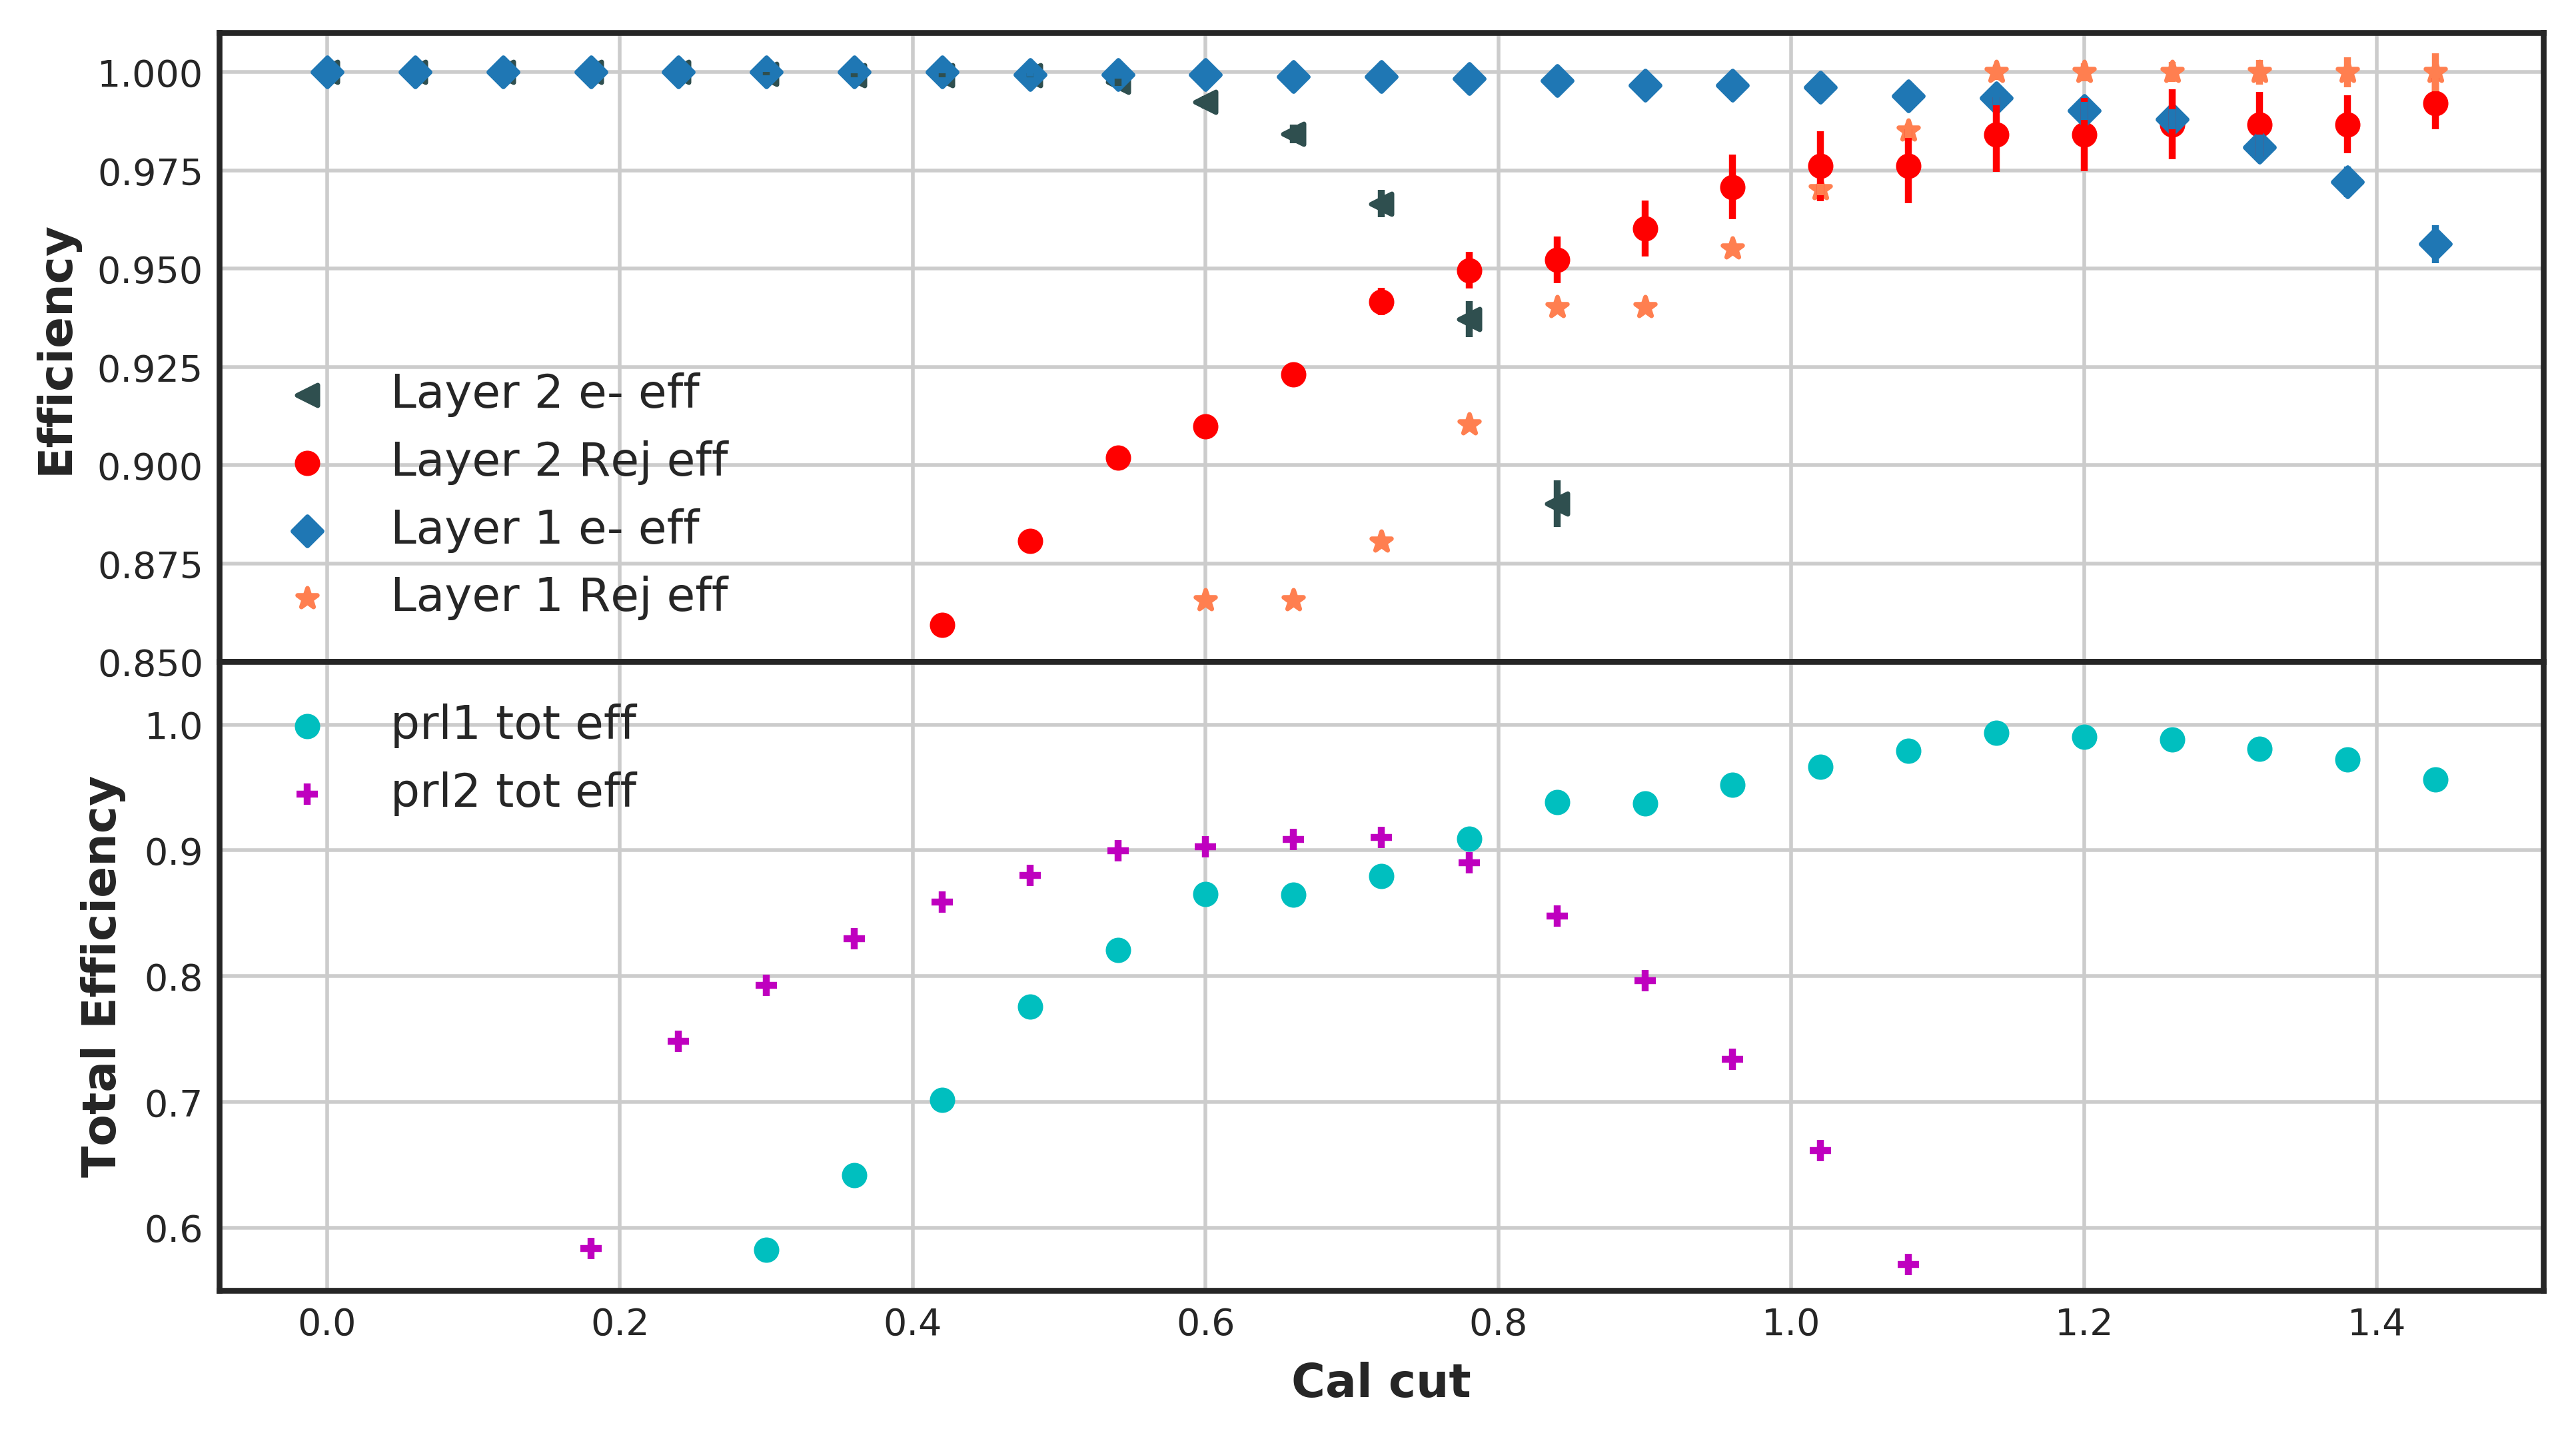

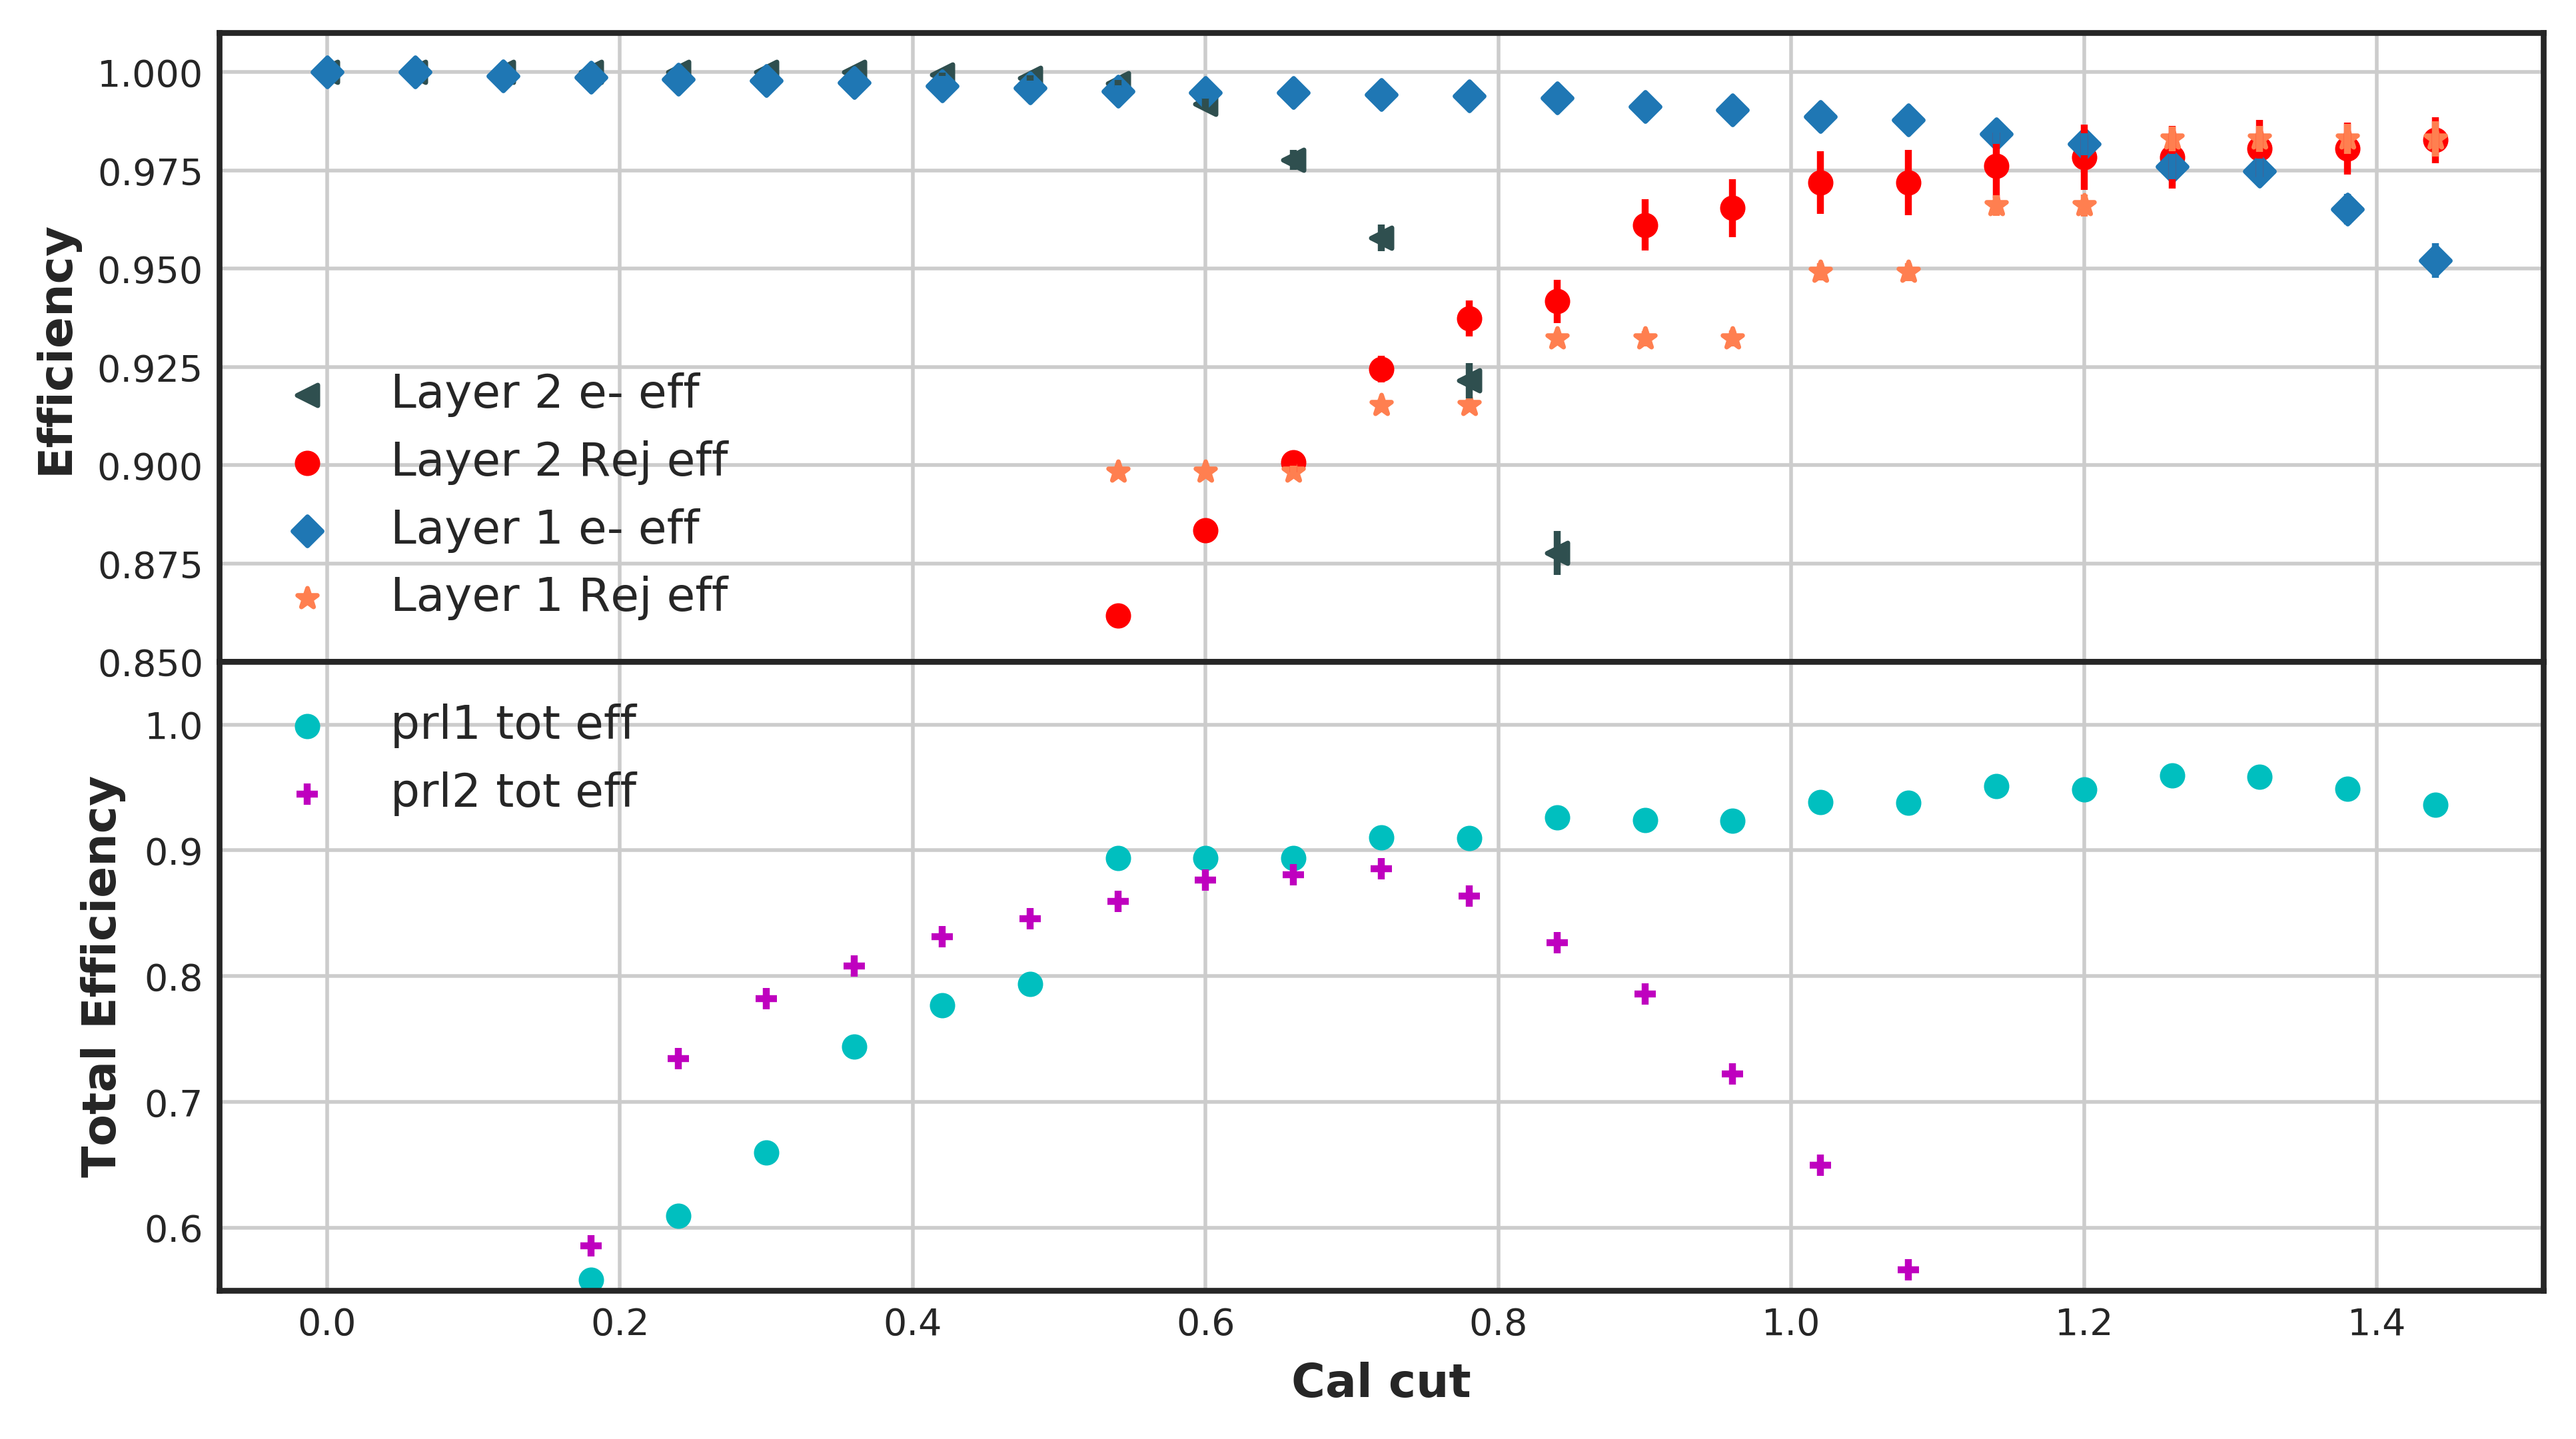

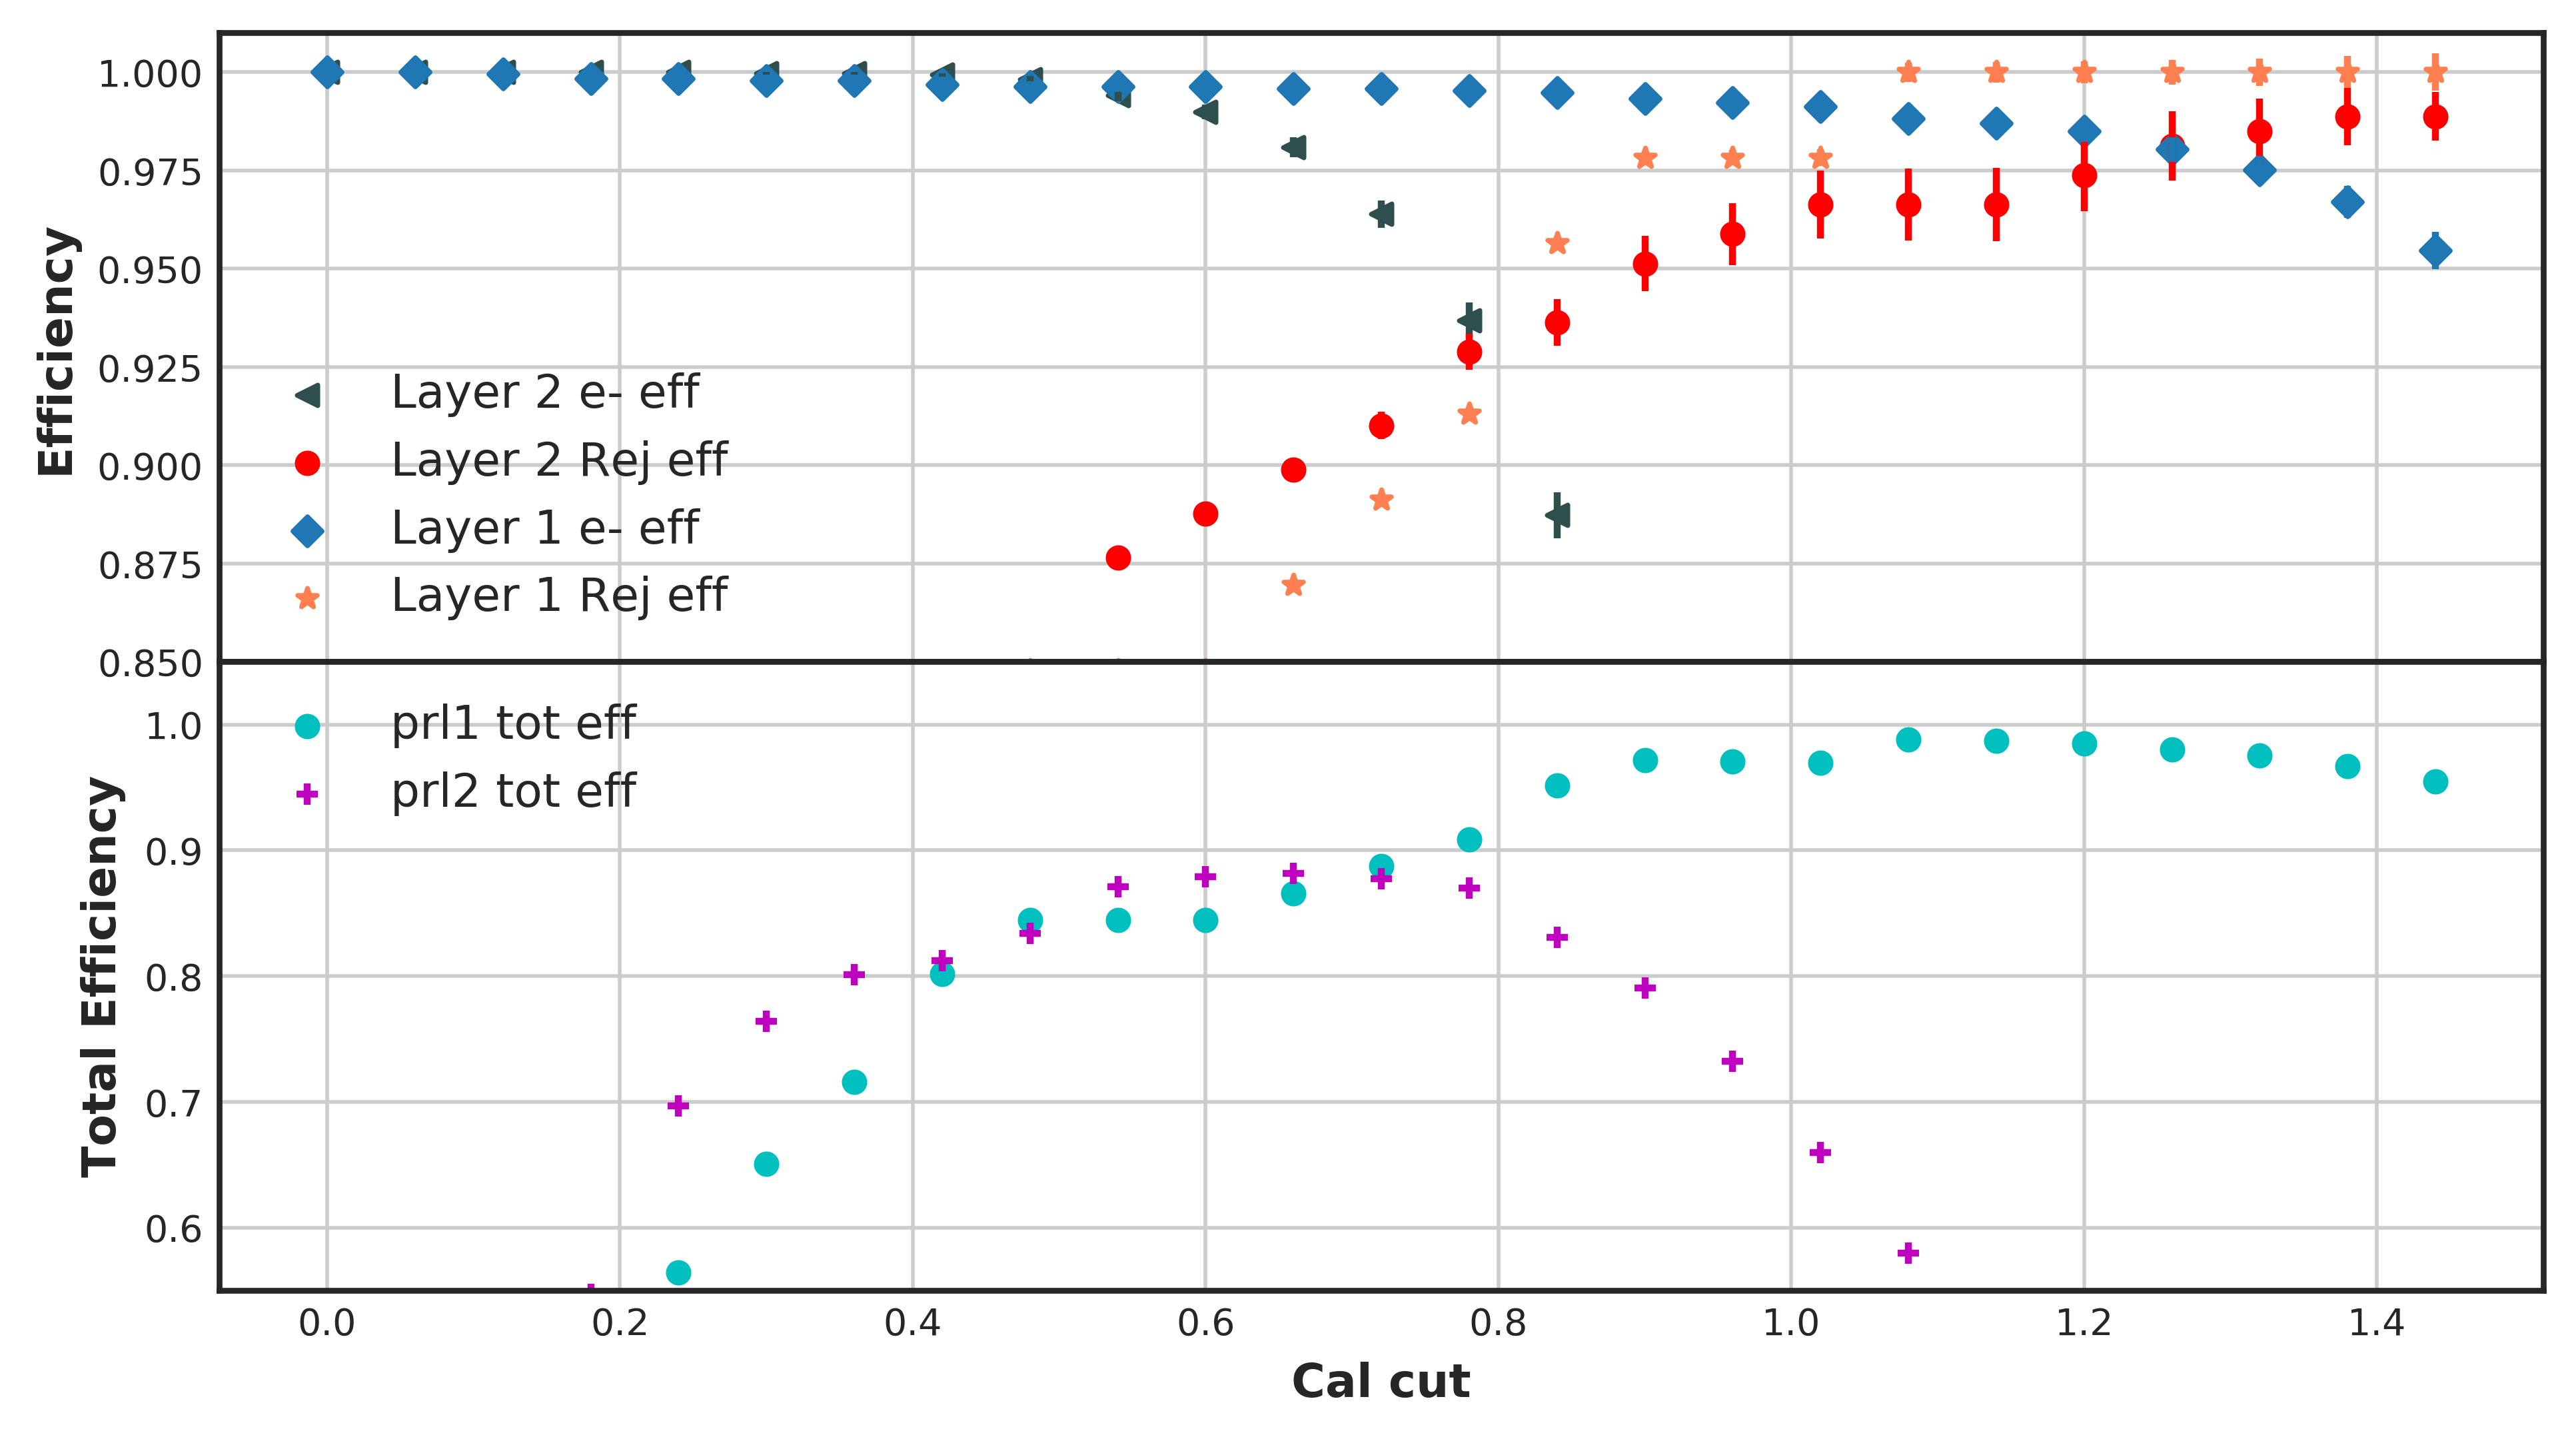

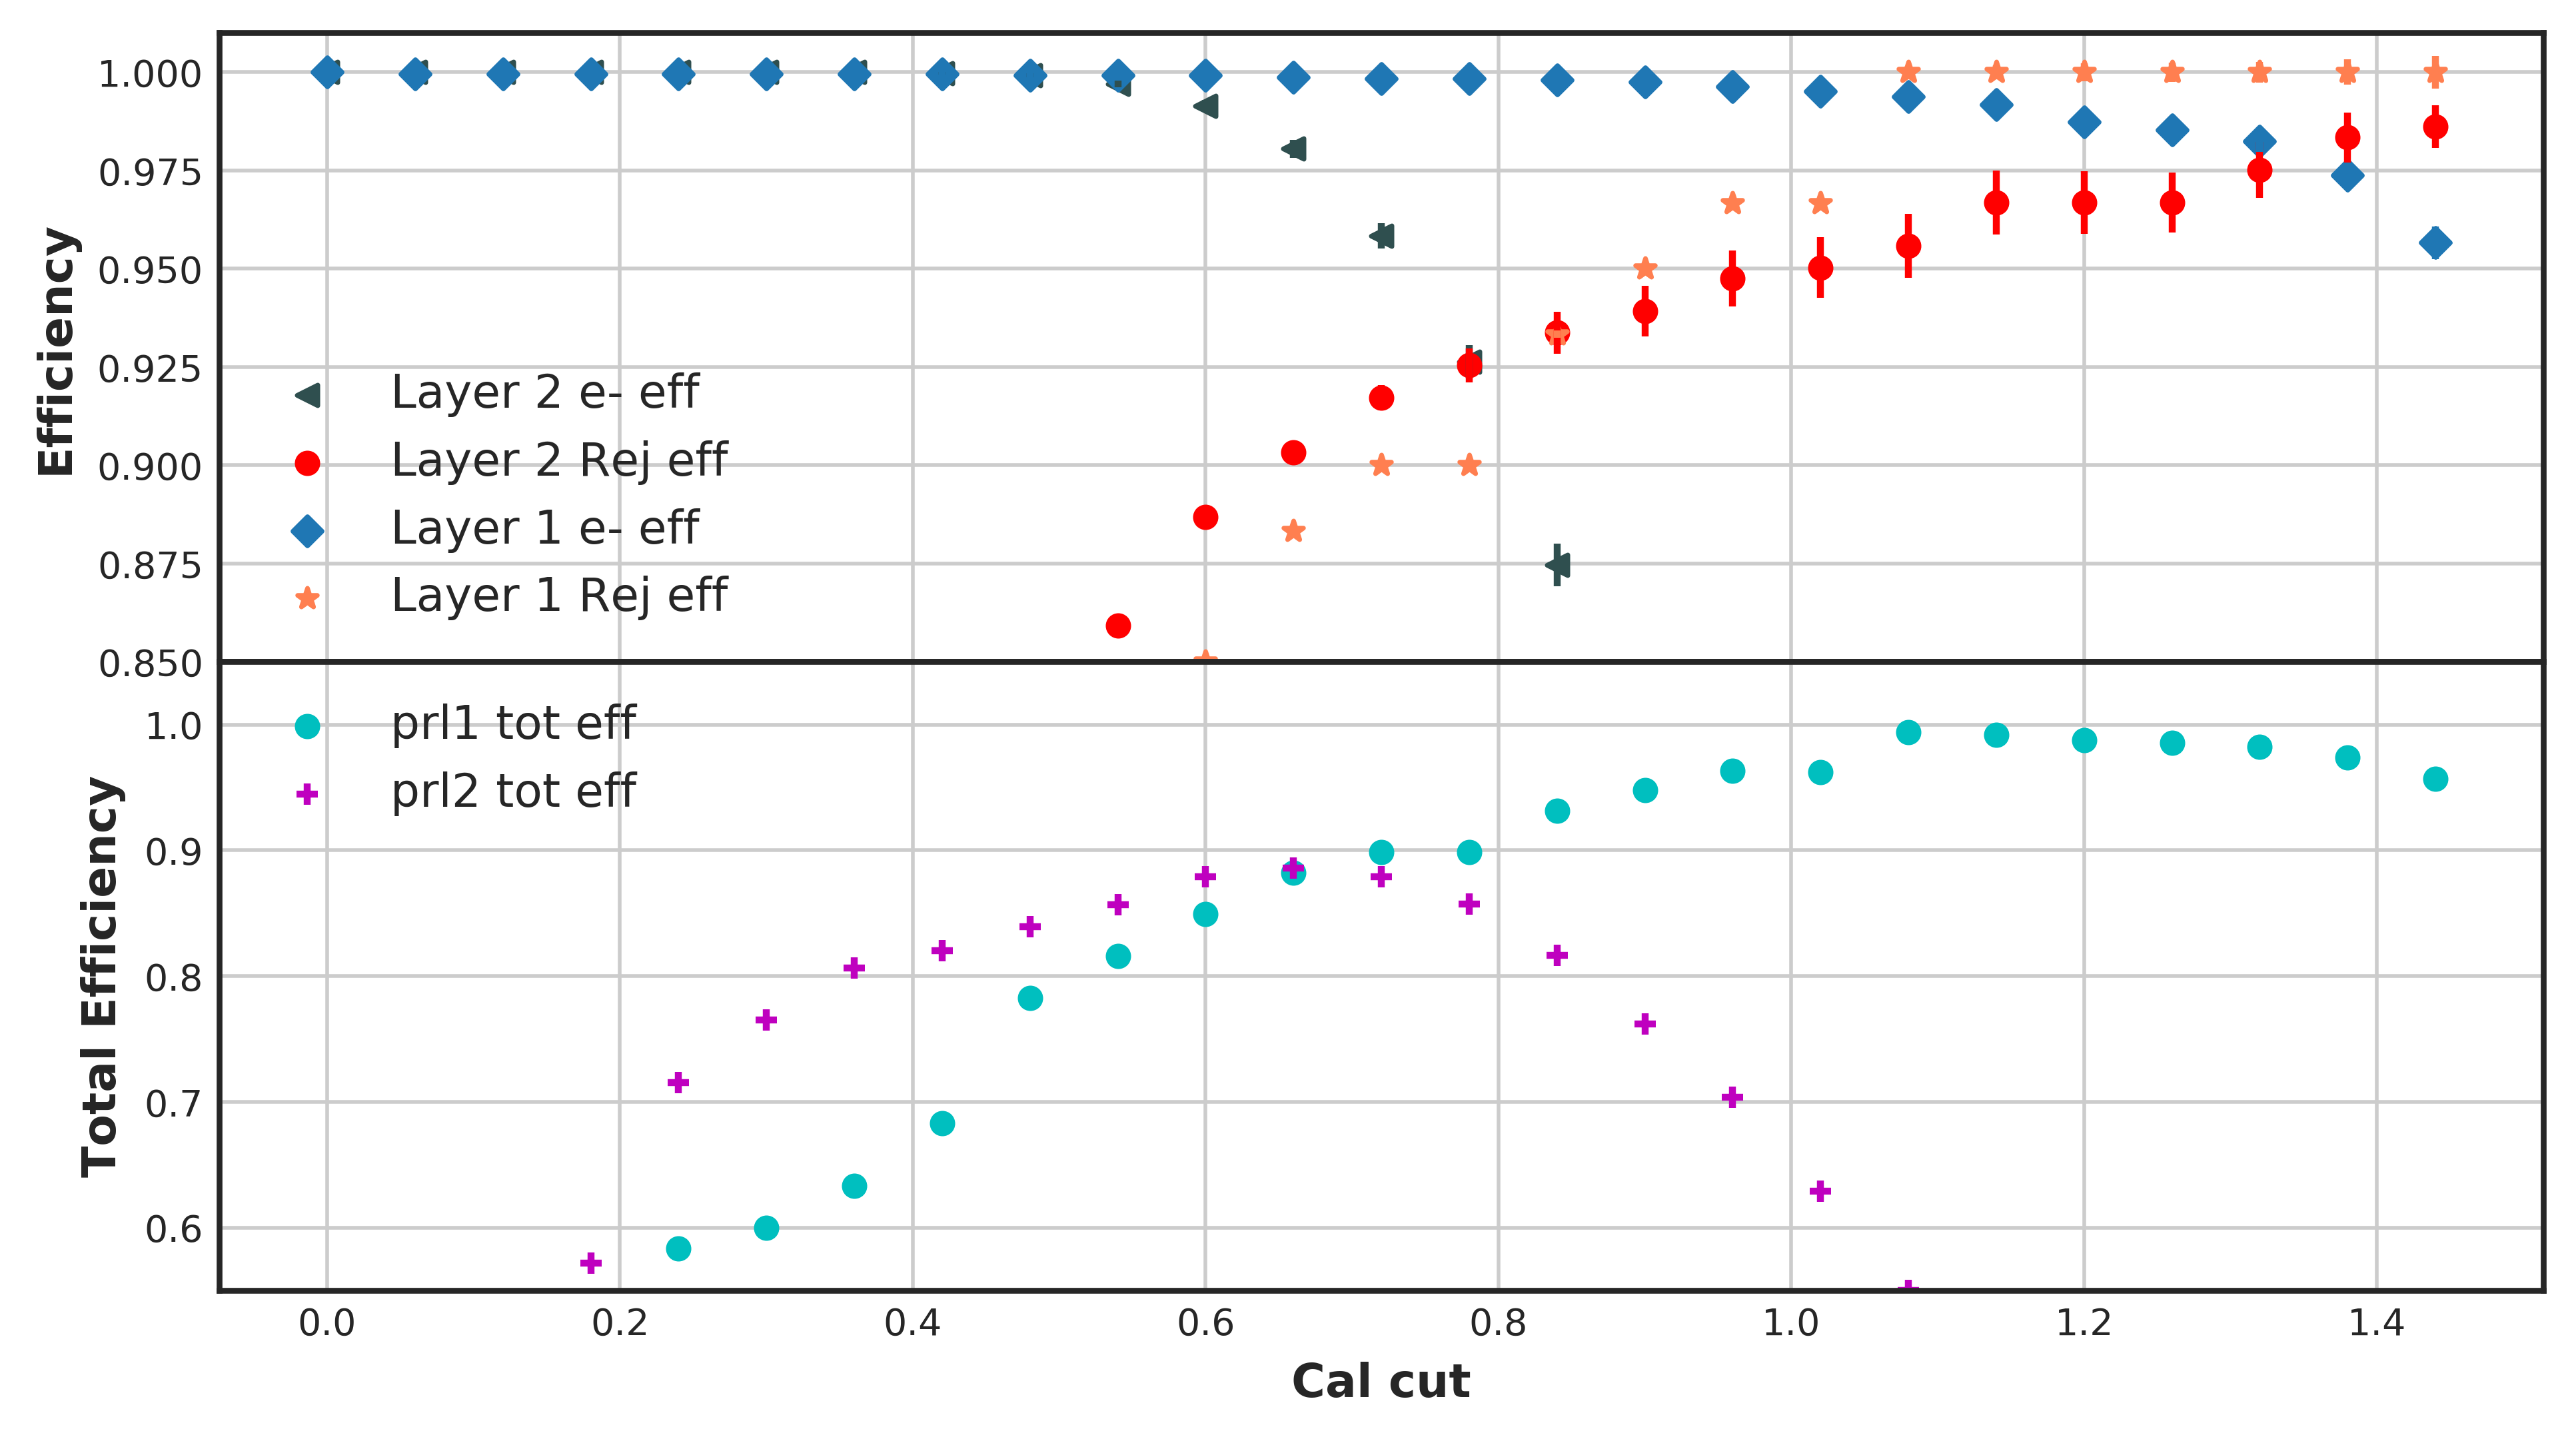

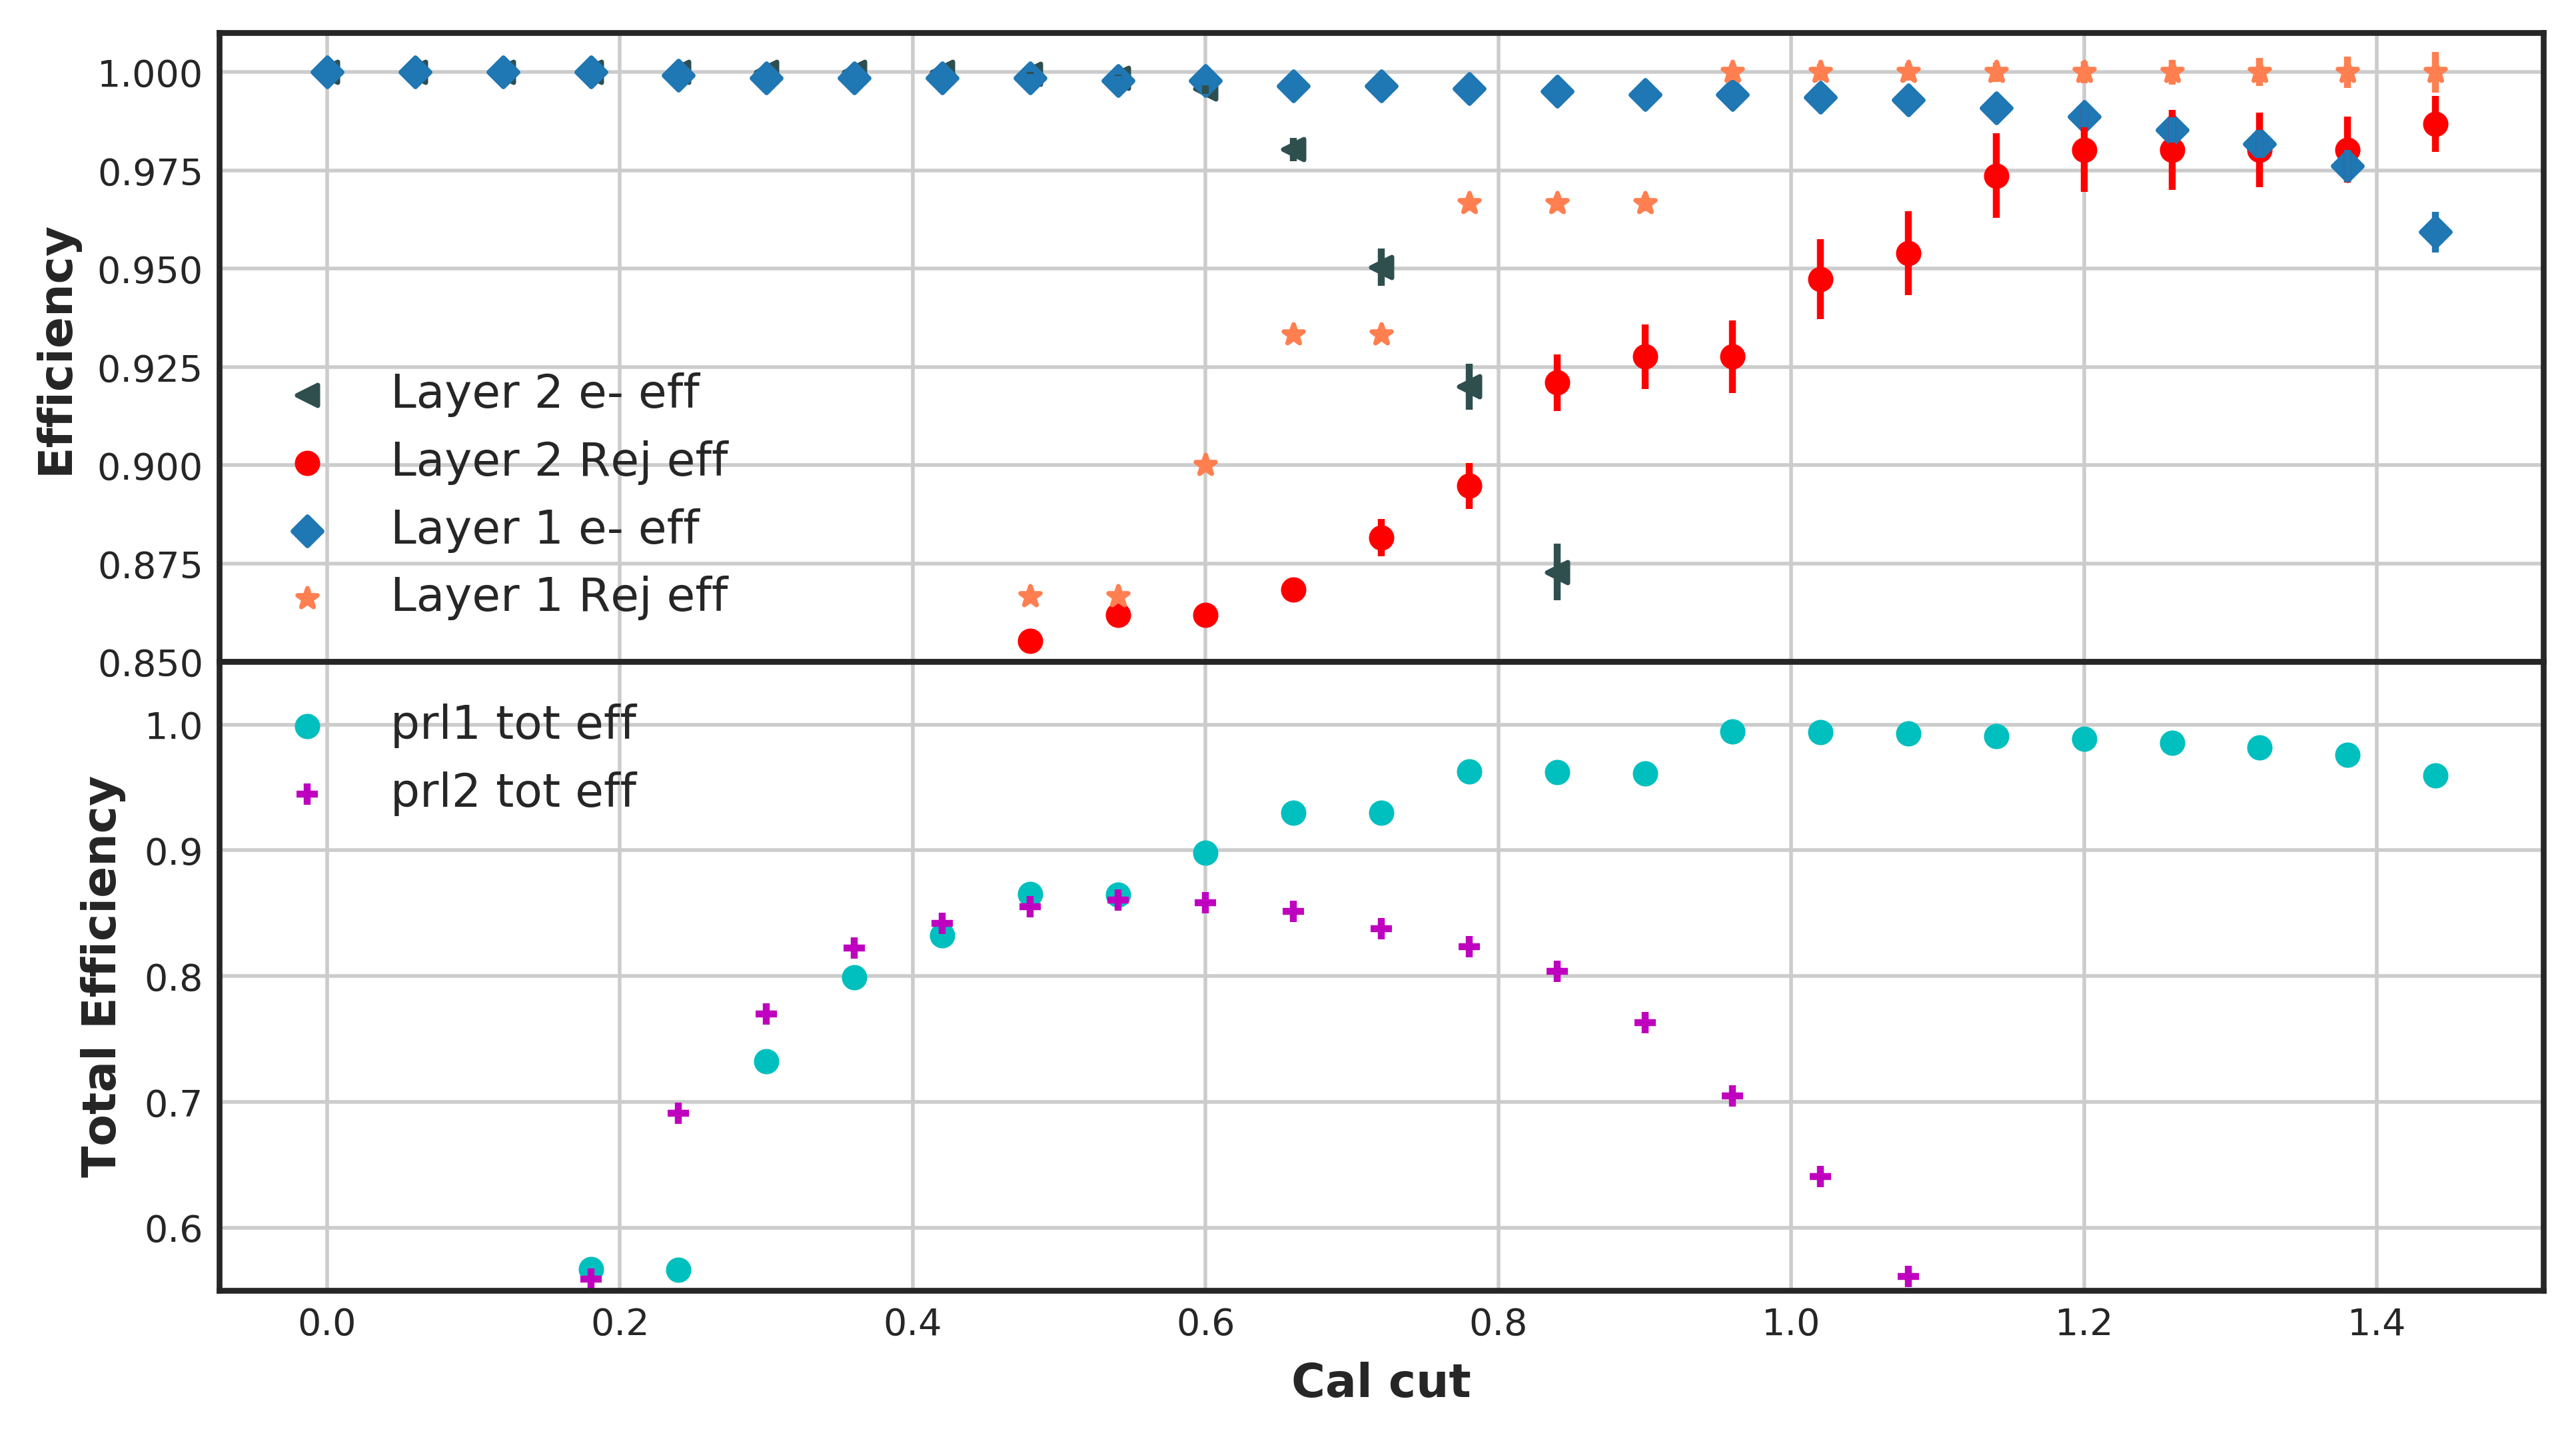

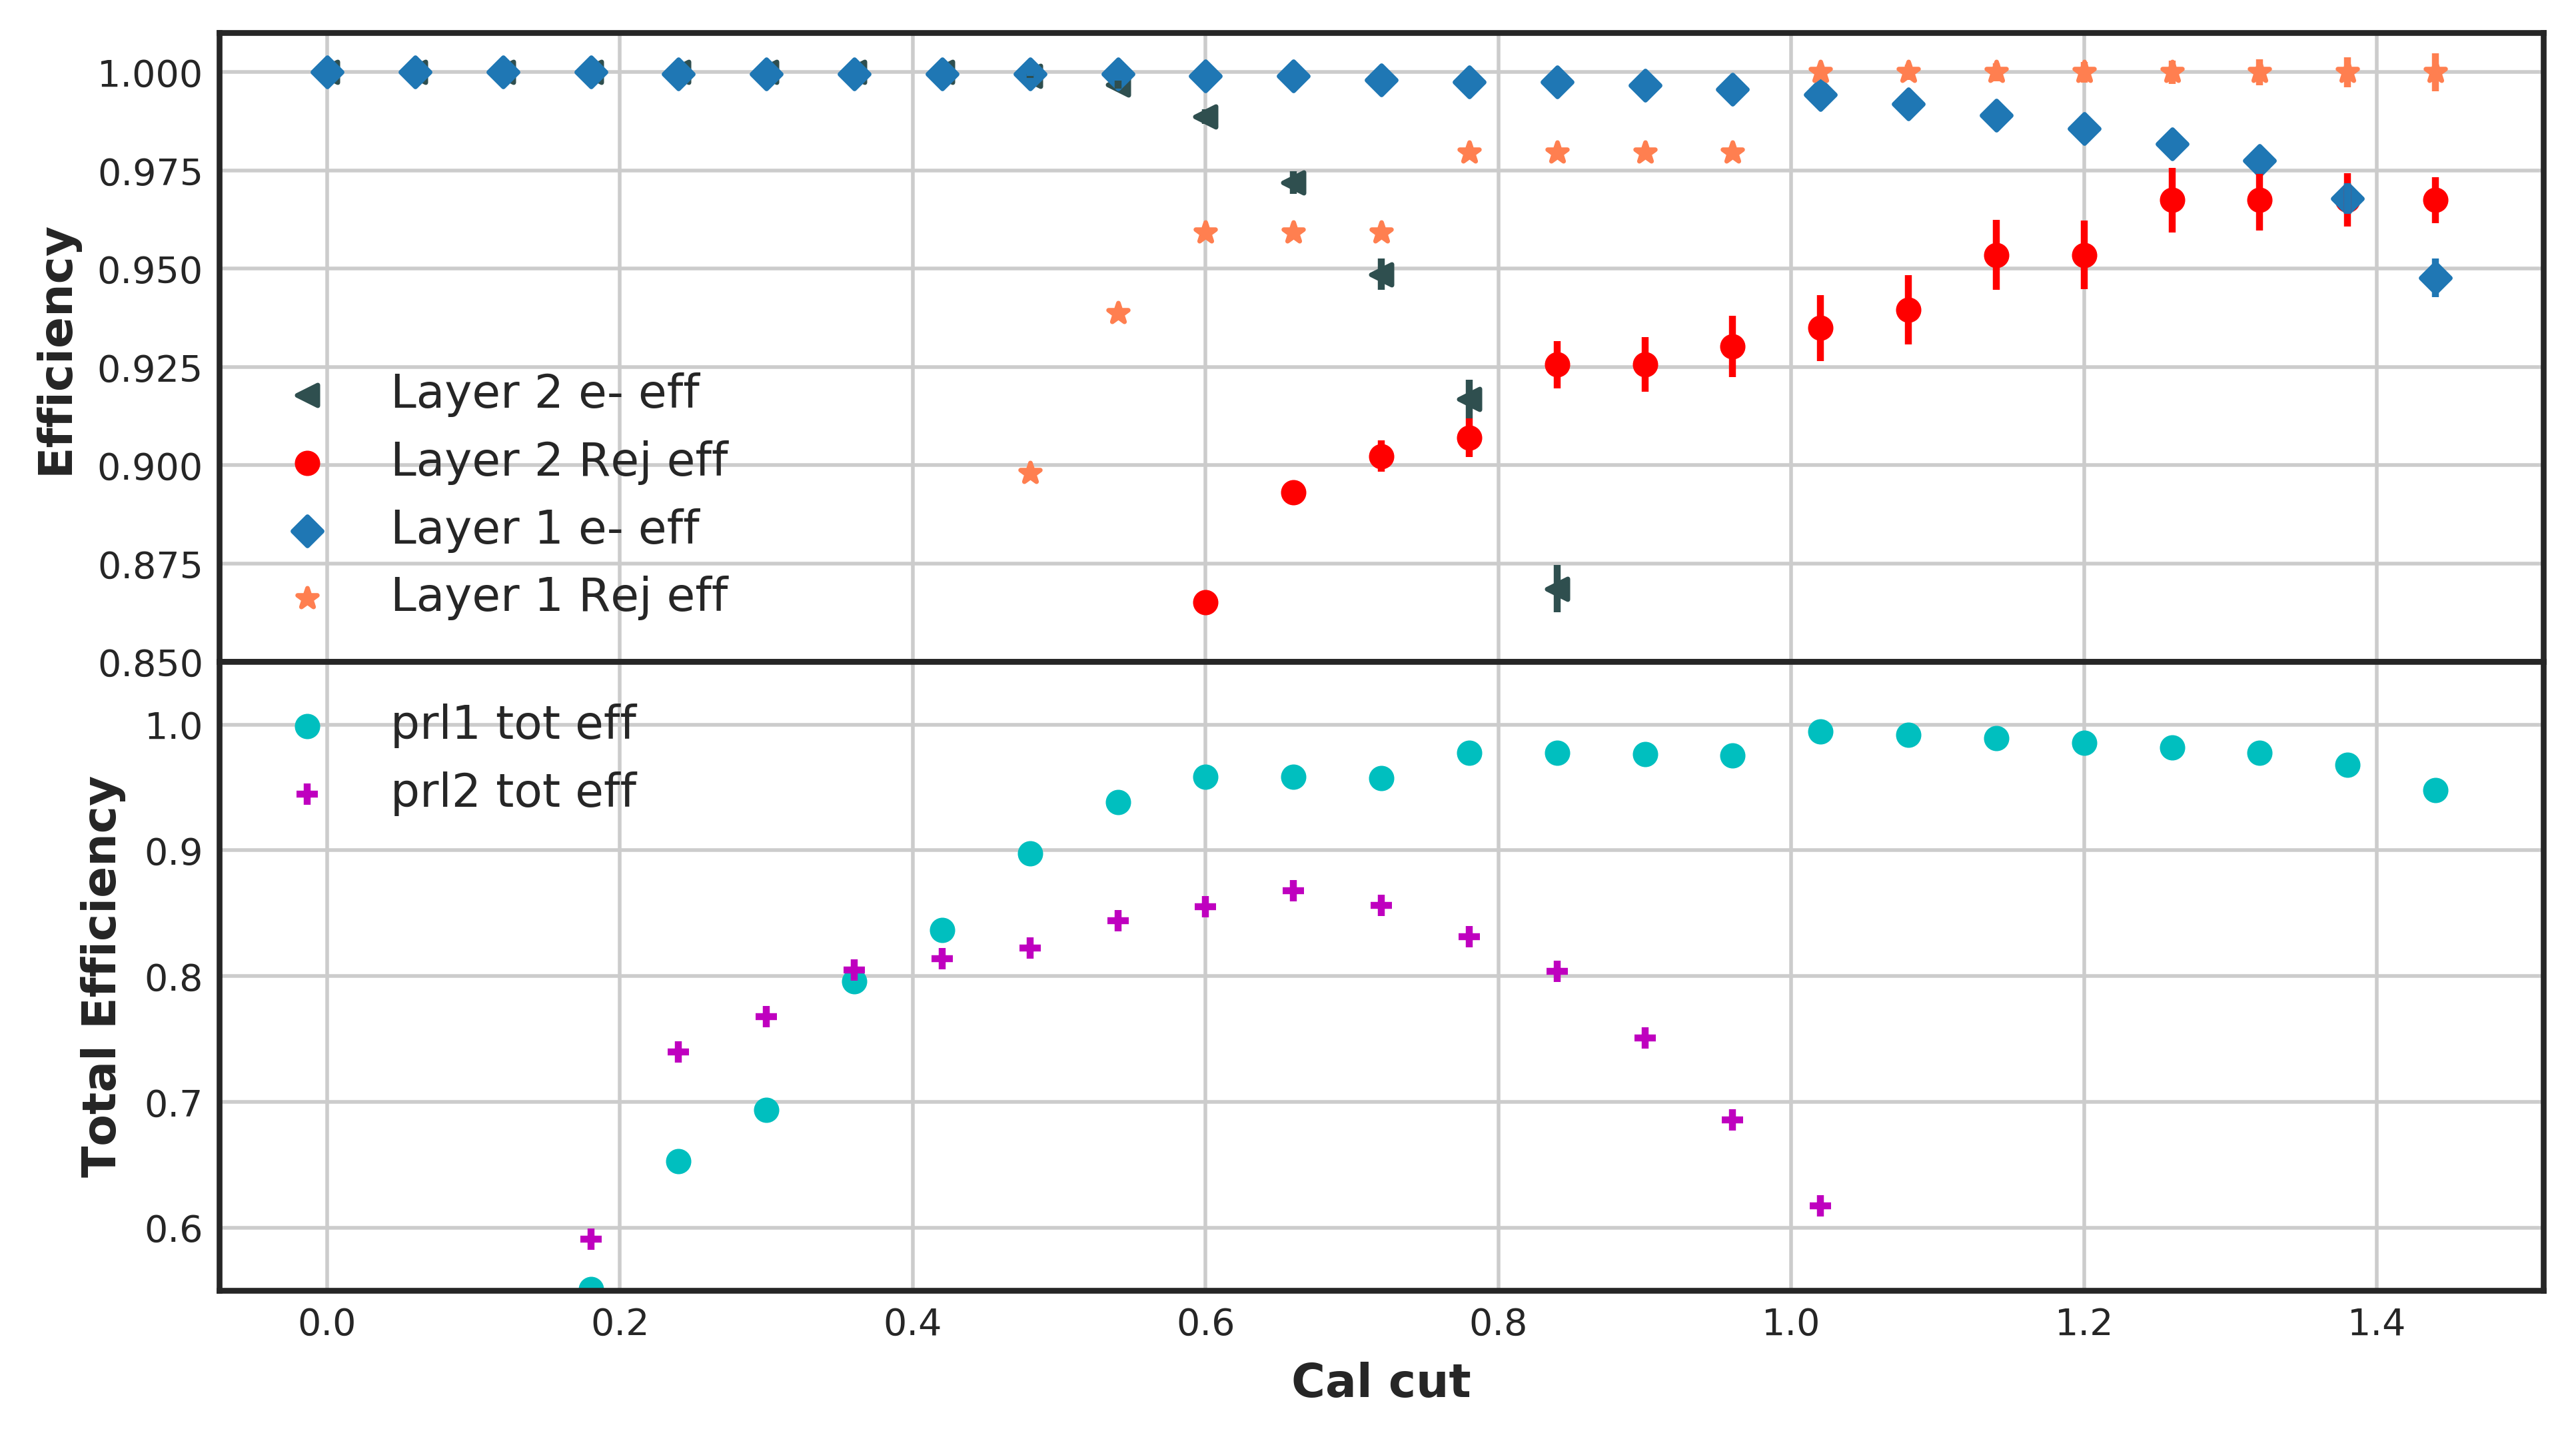

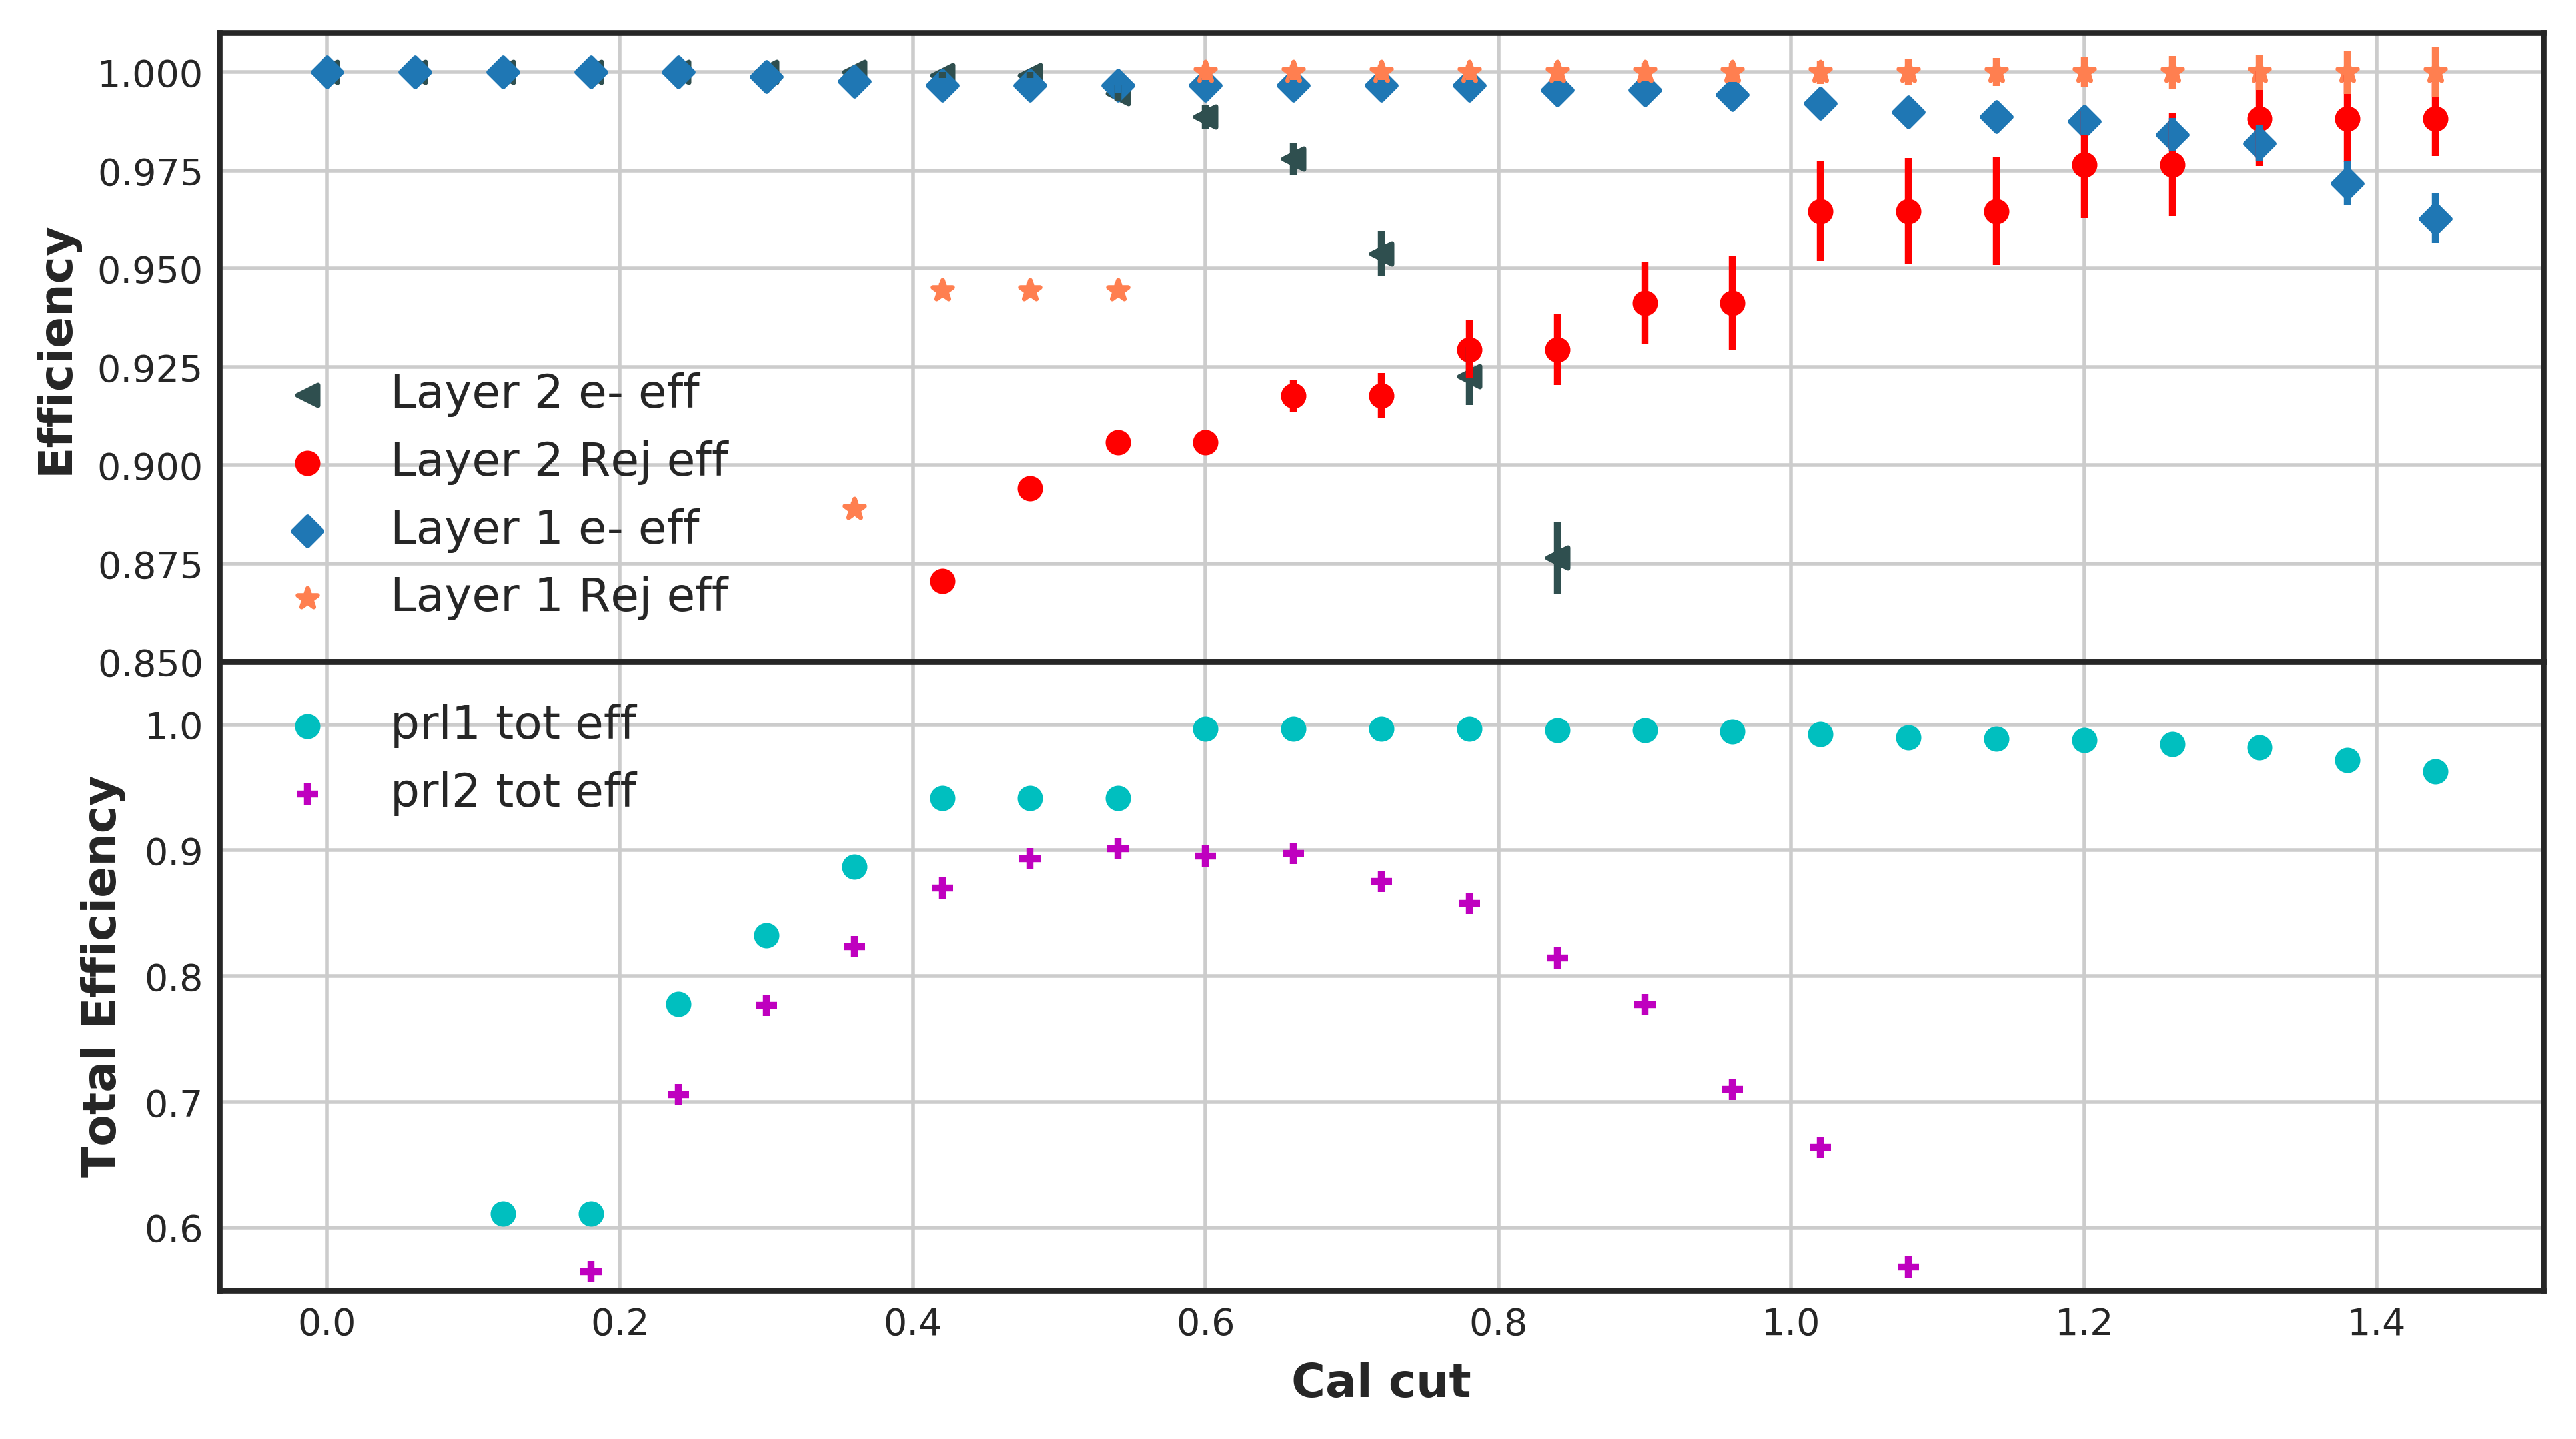

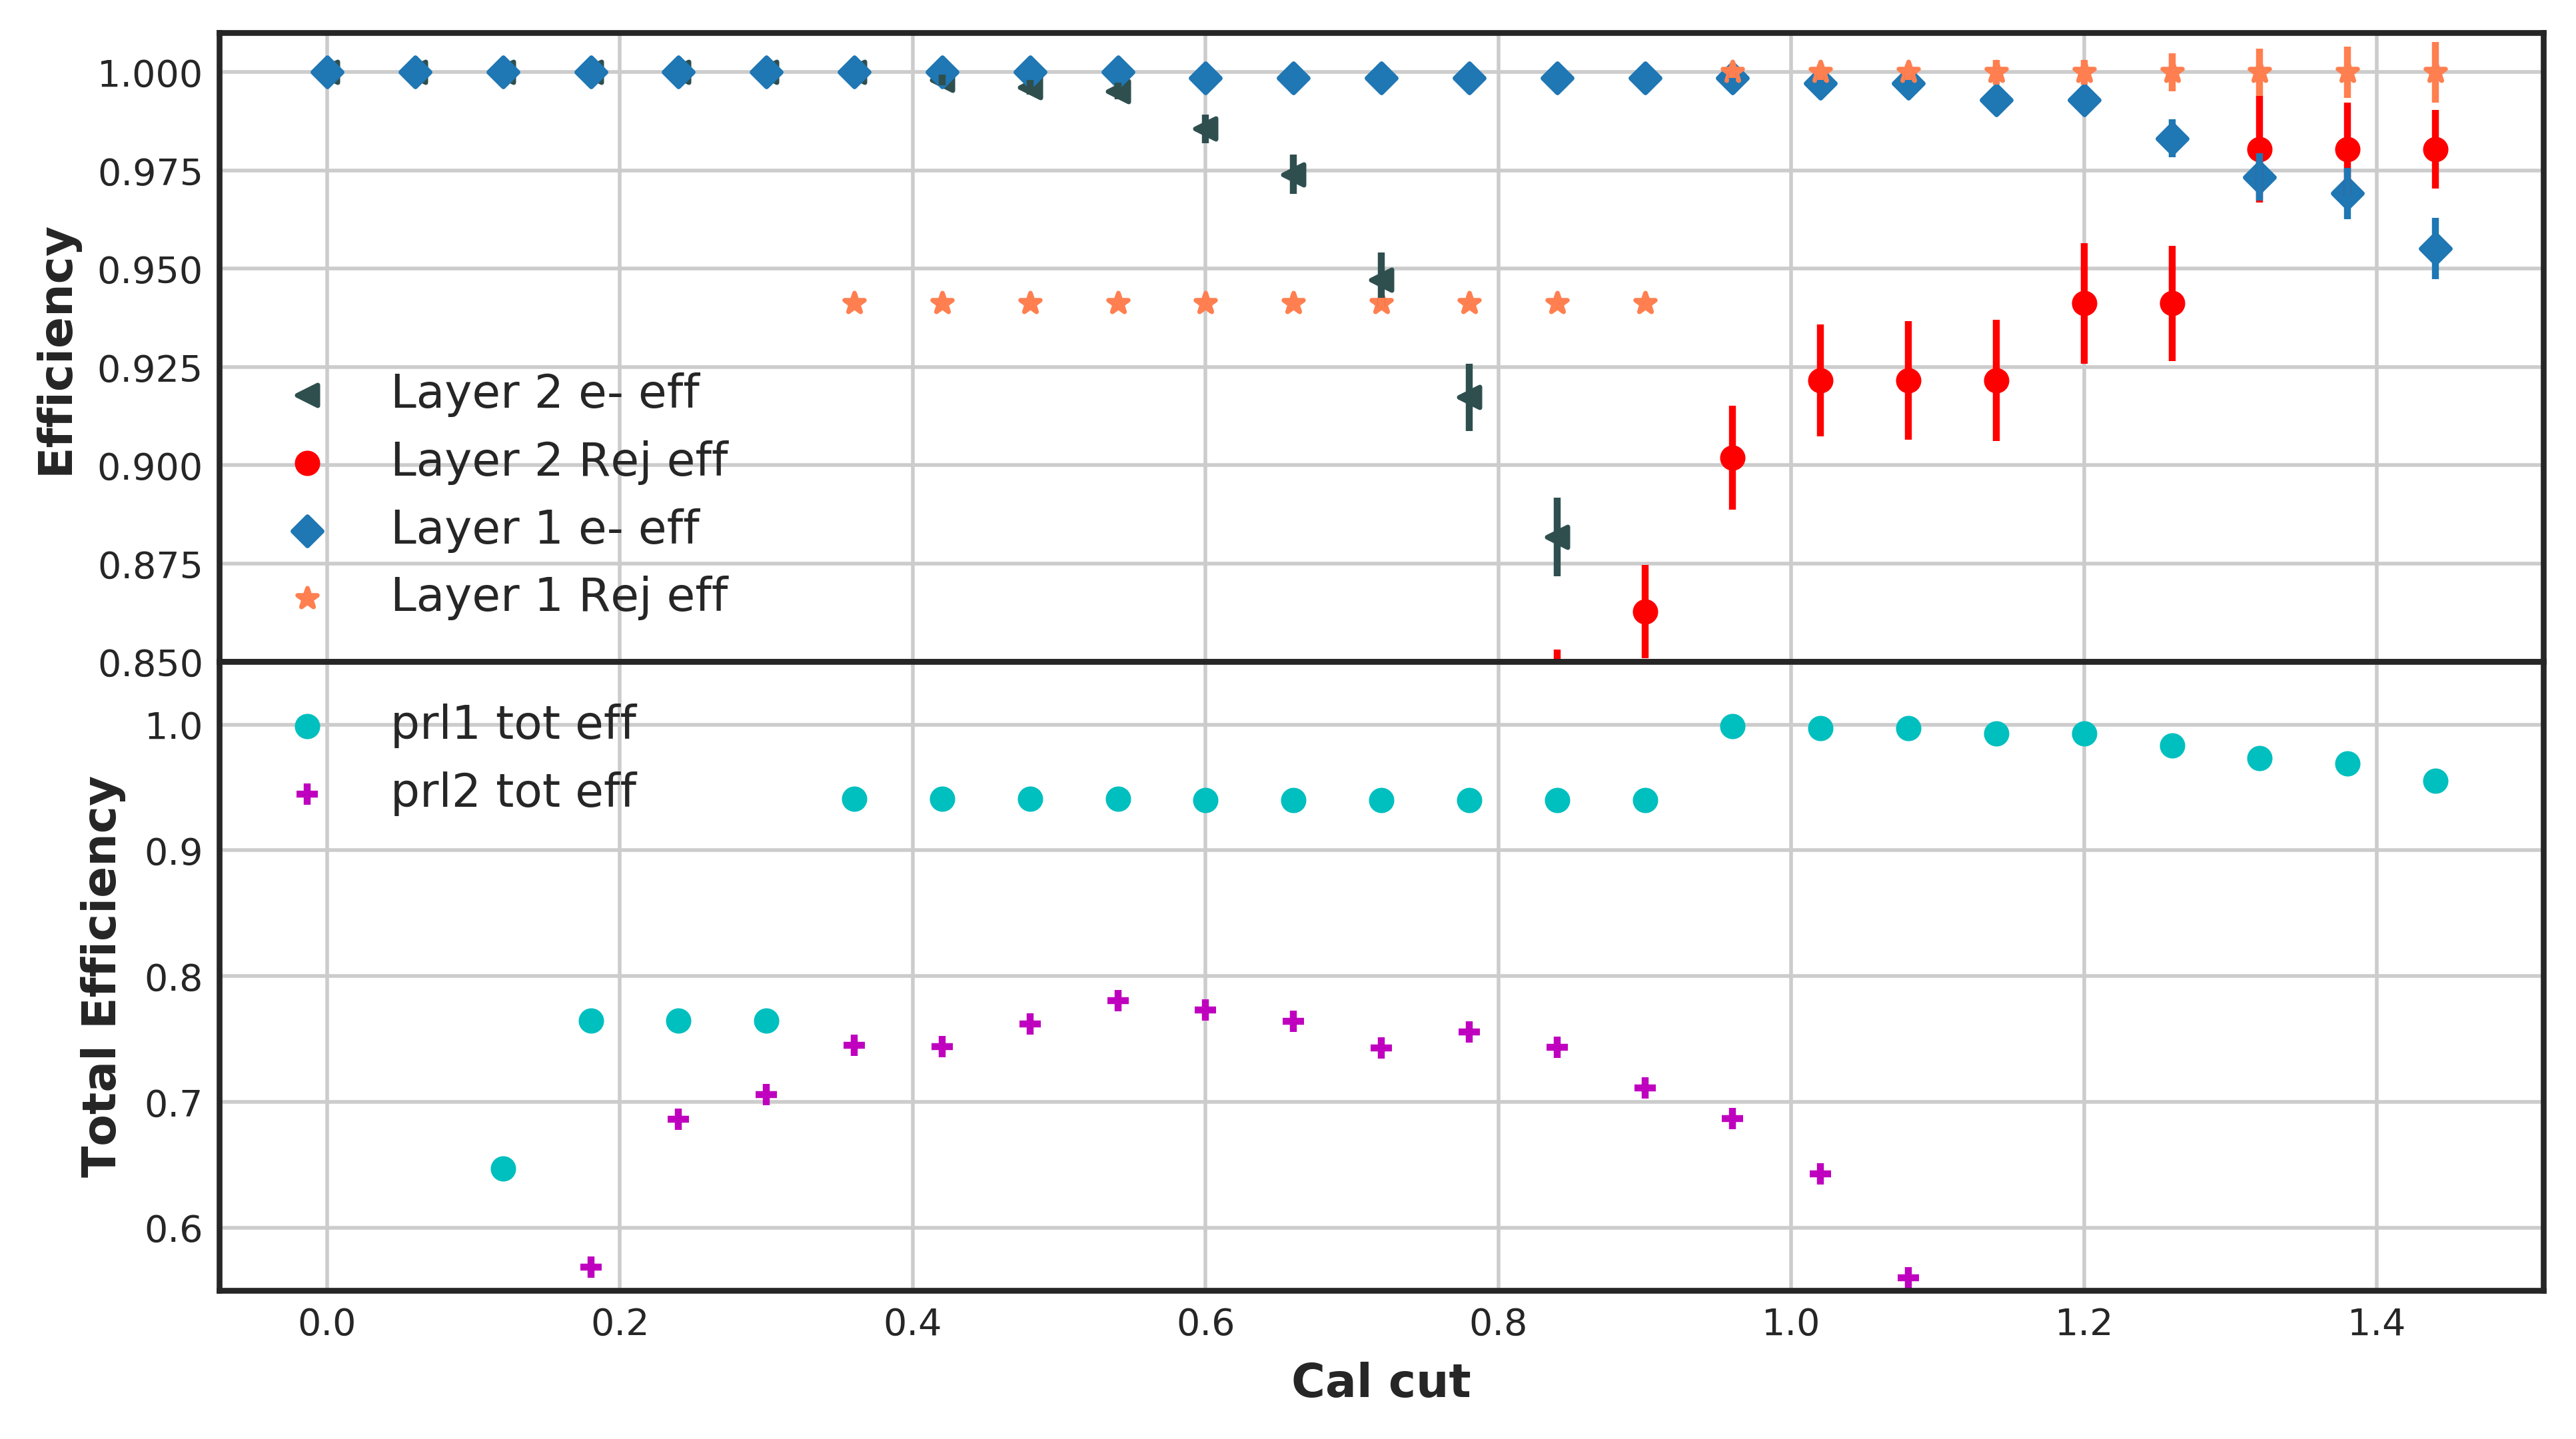

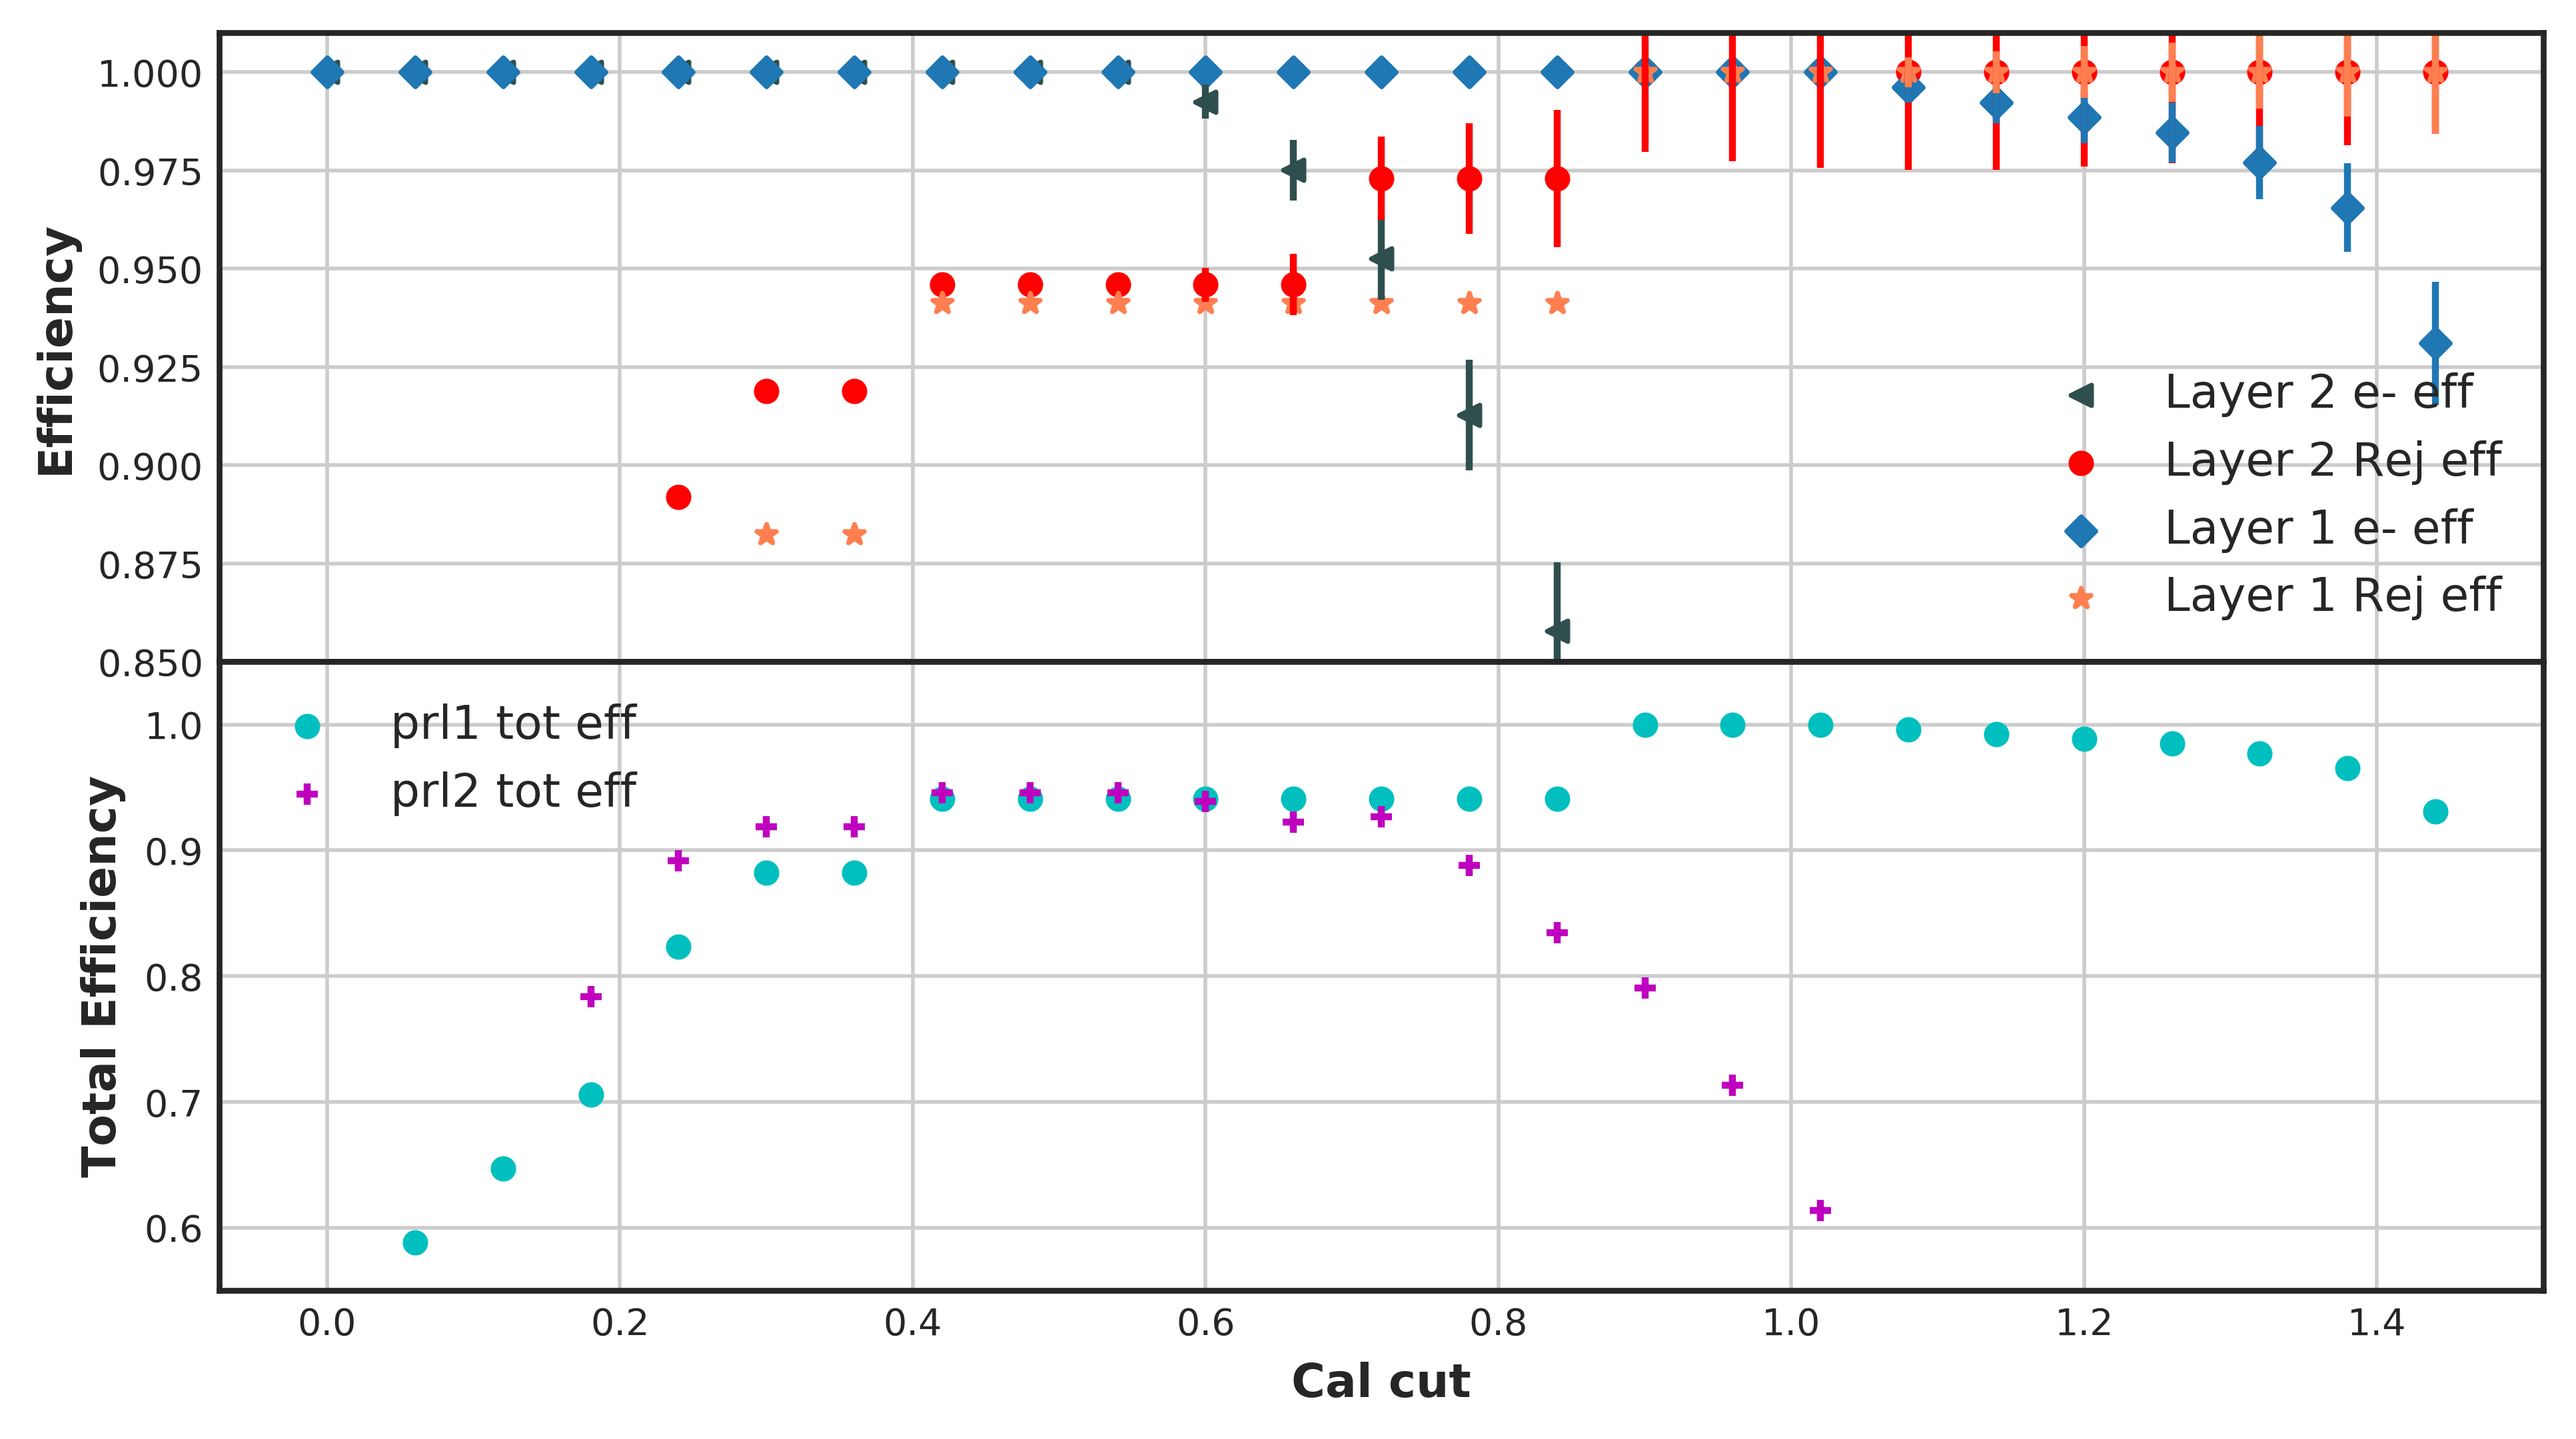

In [15]:
    
color=iter(cm.jet(np.linspace(0,1,len(files))))
m = ["o", "<", "D", "*","+","H","o", "<", "D", "*","+","H"]
x2={}
x3={}
DF={}
i=0

for file in files:
        DF[i]= pd.read_csv(file)
        kin= file.replace("./images/cal_layer_{}_".format(tgt),"")
        kin=kin.replace(".csv","")

        DF[i]['prl2_tot']= DF[i]['prl2_ele_eff']*DF[i]['prl2_nele_eff']
        DF[i]['prl1_tot']= DF[i]['prl1_ele_eff']*DF[i]['prl1_nele_eff']
        DF[i]['cer_tot']=  DF[i]['cer_ele_eff'] *DF[i]['cer_nele_eff']


        fig= plt.figure(dpi=500,figsize=(9,5))
        x1=plt.subplot(2,1,1)
        #x1.set_title( "PID eff for {} kin {}".format(tgt,kin))
        DF[i].plot(ax=x1,y='prl2_ele_eff',yerr='prl2_ele_eff_err',x="Cut_prl2",kind='scatter',c="darkslategrey",marker=m[1],label='Layer 2 e- eff')
        DF[i].plot(ax=x1,y='prl2_nele_eff',yerr='prl2_ele_eff_err',x="Cut_prl2",kind='scatter',c='r',marker=m[0],label='Layer 2 Rej eff')
        DF[i].plot(ax=x1,y='prl1_ele_eff',yerr='prl1_ele_eff_err',x="Cut_prl1",kind='scatter',marker=m[2],label='Layer 1 e- eff')
        DF[i].plot(ax=x1,y='prl1_nele_eff',yerr='prl1_ele_eff_err',x="Cut_prl1",kind='scatter',c='coral',marker=m[3],label='Layer 1 Rej eff')
        x1.set_ylabel("Eff")
  
        x1.set_ylim(0.85,1.01)
        x1.set_xlabel("Layer energy cut value")
        plt.ylabel("Efficiency")
        x1.grid(True)
        fig.subplots_adjust(hspace=0.0)

        x2=plt.subplot(2,1,2,sharex=x1)
        DF[i].plot(ax=x2,y='prl1_tot',x="Cut_prl1",kind='scatter',c='c',marker=m[6],label='prl1 tot eff')
        DF[i].plot(ax=x2,y='prl2_tot',x="Cut_prl2",kind='scatter',c='m',marker=m[4],label='prl2 tot eff')
        
        x1.set_xlabel("Layer energy cut value")
        plt.ylabel("Efficiency")
        plt.grid(True)
        
        x2.set_ylim(0.55,1.05)
        plt.xlabel("Cal cut")
        plt.ylabel("Total Efficiency")
        plt.grid(True)
        fig.savefig("./images/PID_3layer_plot_{}_{}.eps".format(tgt,kin),bbox_inches='tight')


        i=i+1




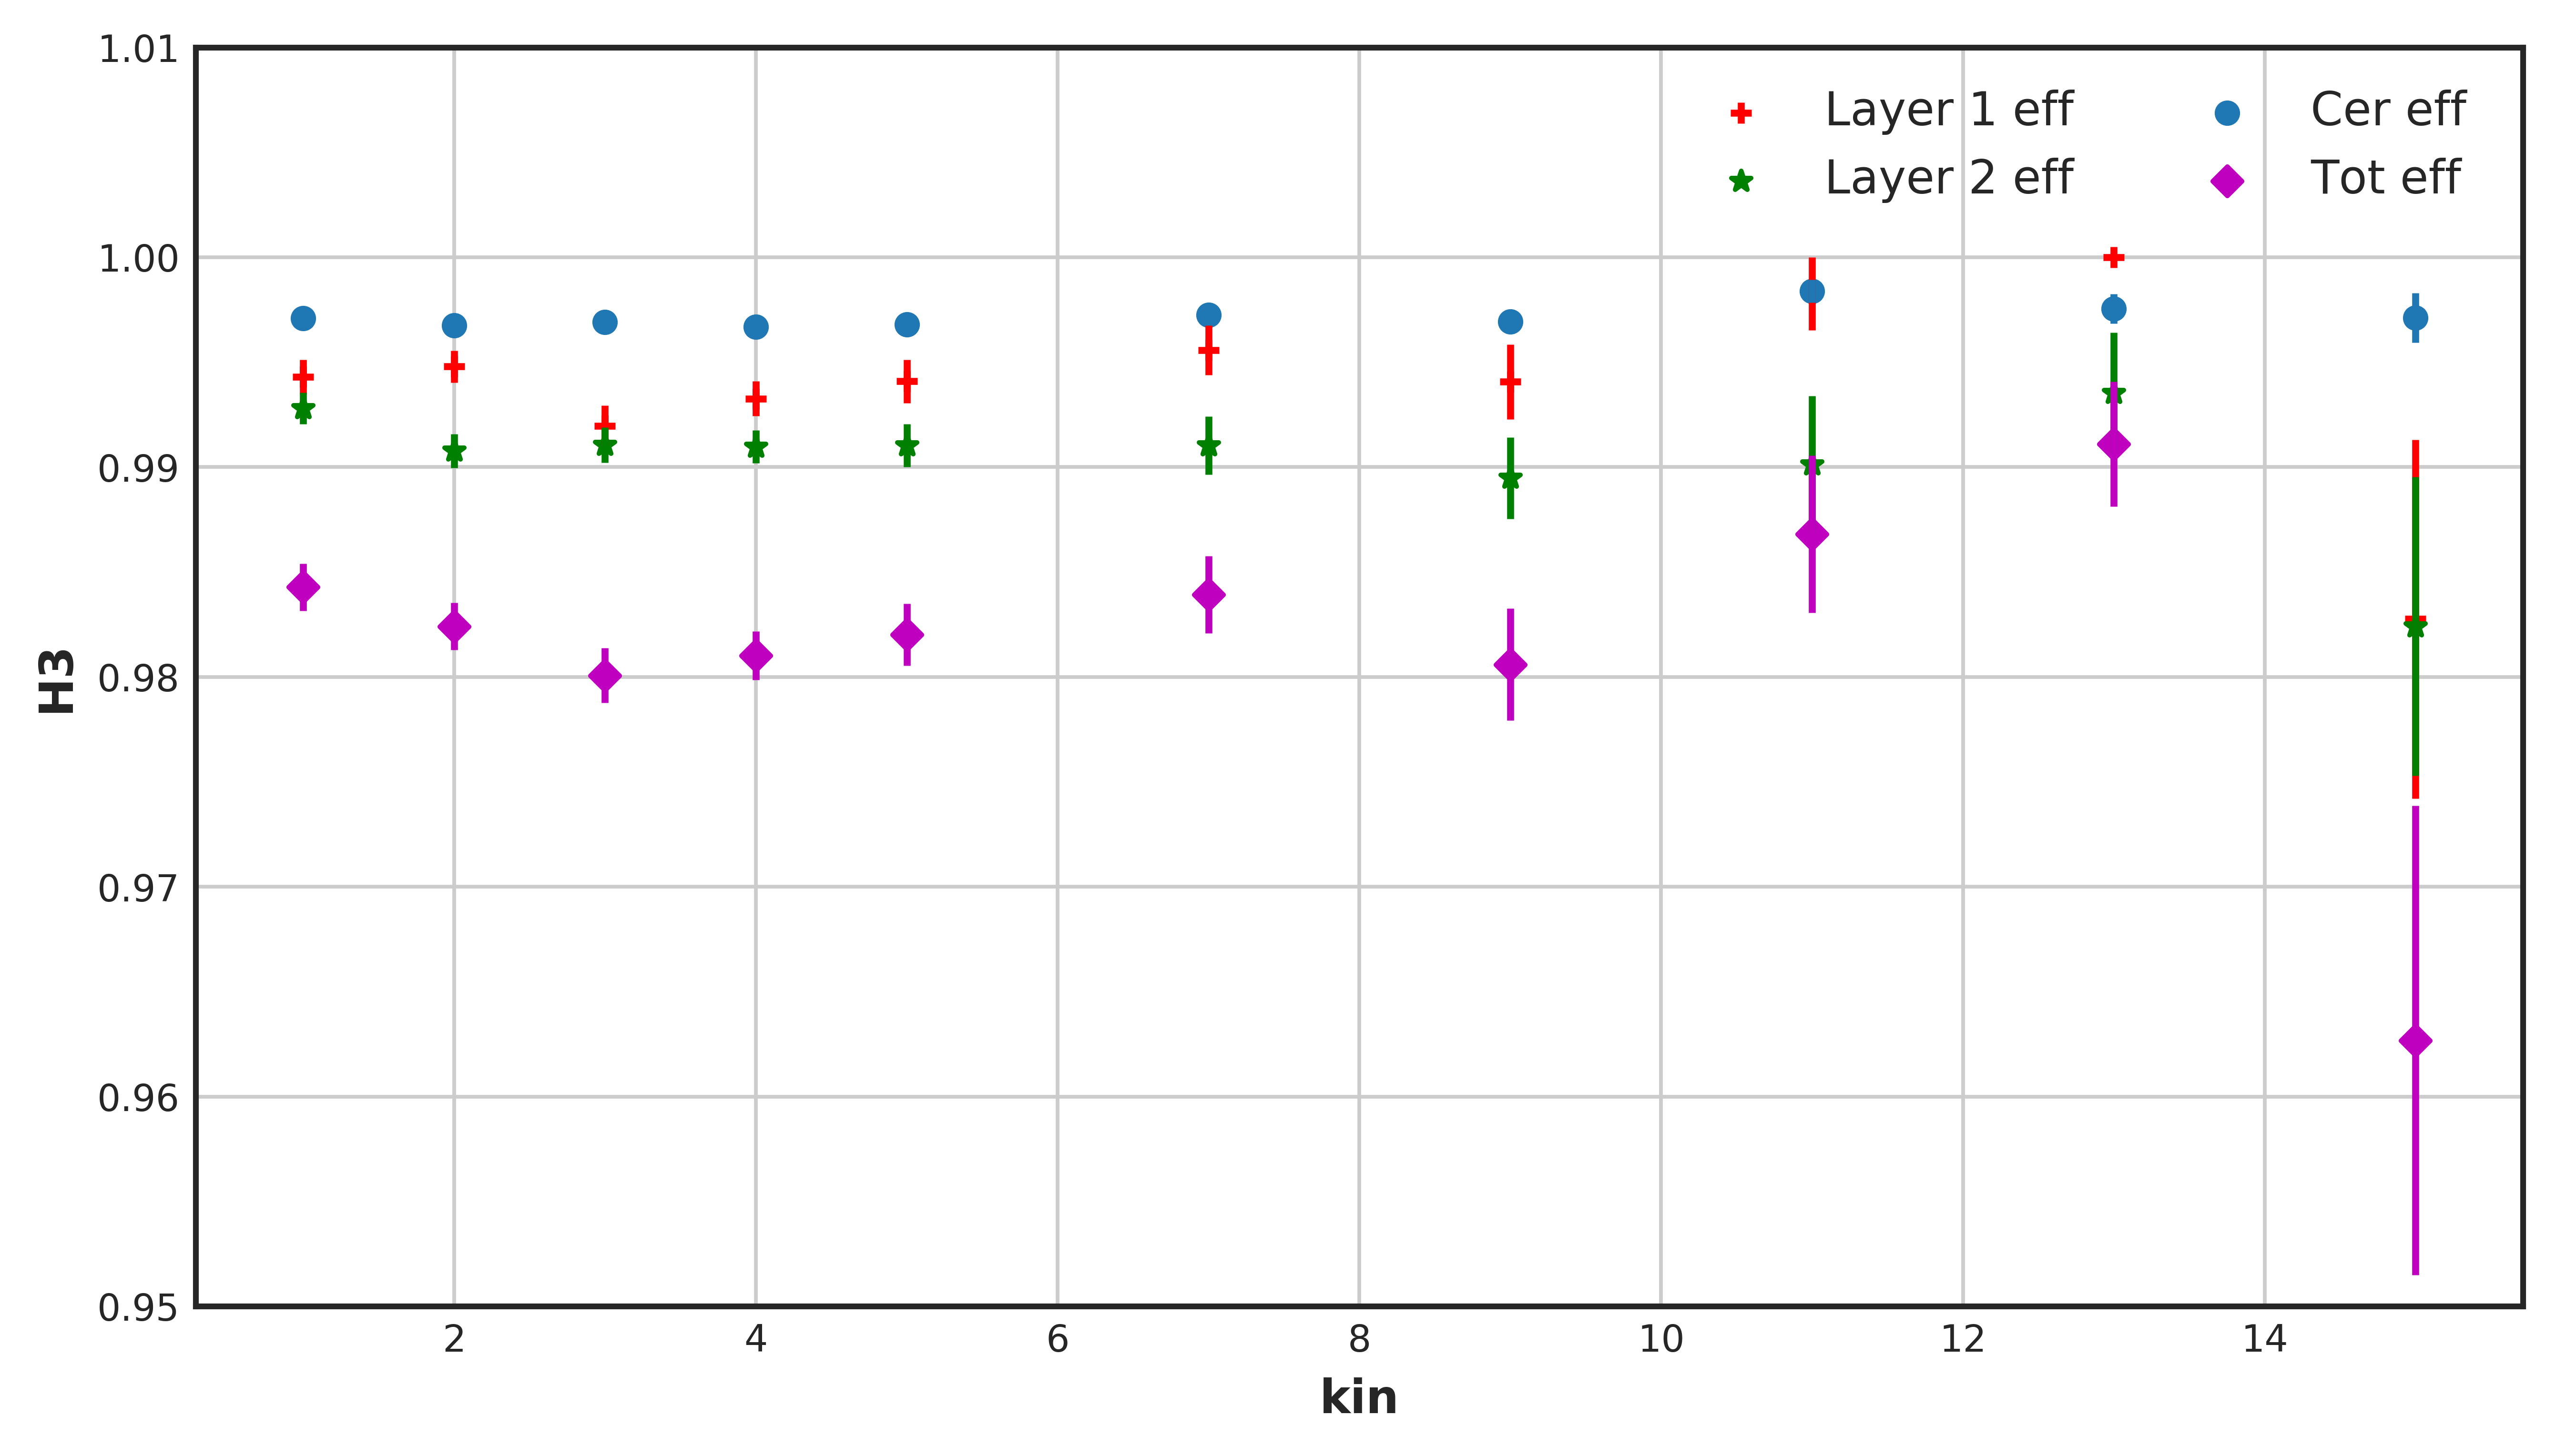

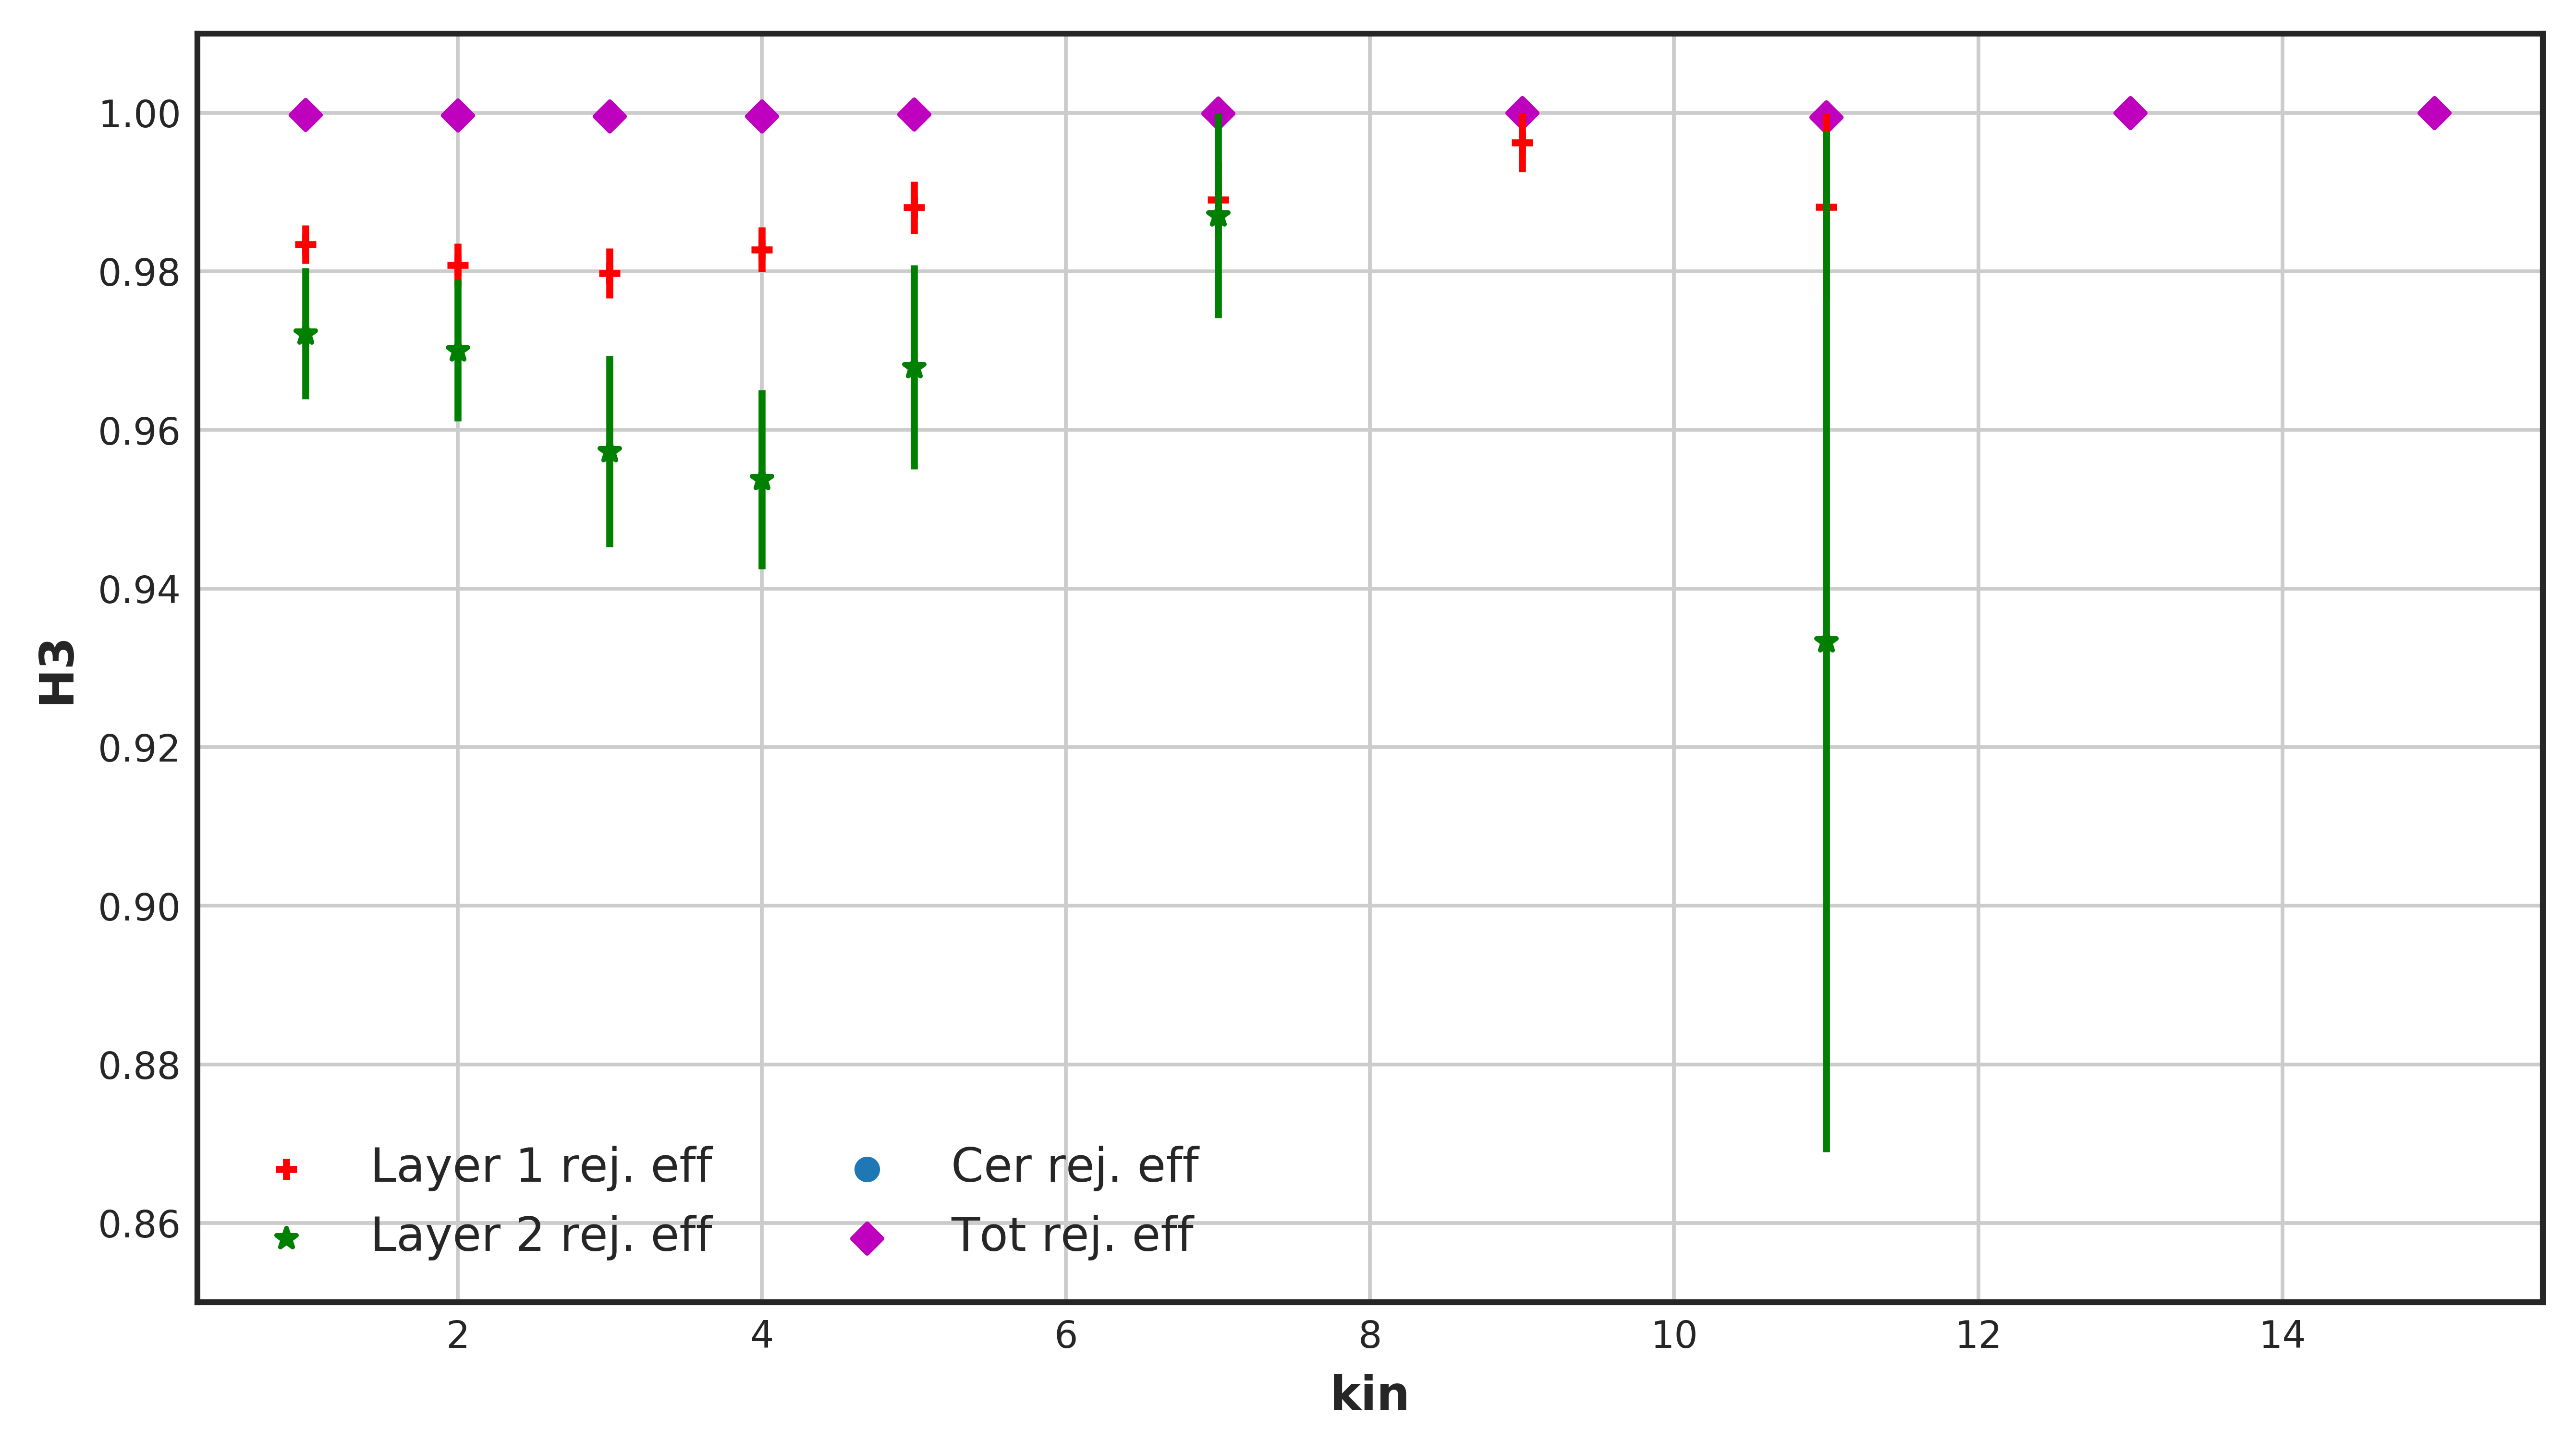

In [11]:
allkinfiles = glob.glob("PID_allkin_H3.csv")
DFak1={}
DFak={}
index={1,2,3,4,5,7,9,11,13,15}
i=0
    
fig =plt.figure(dpi=700,figsize=(11.5,9))


for file in allkinfiles:
    DFak1[i]=pd.read_csv(file);
    DFak[i]=DFak1[i][DFak1[i].values.sum(axis=1)!= 1].copy() 
    
    
    #DFak[i]["Kin"]=index
    DFak[i]["Tot_rej"]=1-(1-DFak[i]['Cer_ne_eff'])*(1-DFak[i]['Prl1_ne_eff'])*(1-DFak[i]['Prl2_ne_eff'])
    #DFak[i]['nTot_err']= 
    
    tgt=file.replace("PID_allkin_","")
    
    tgt=tgt.replace(".csv","")
    
    if i ==0:
            xak =plt.subplot(len(allkinfiles),1,i+1)
    else:   
        xak =plt.subplot(len(allkinfiles),1,i+1,sharex=xak)
    
    DFak[i].plot(ax=xak,x='kin', y='Prl1_eff',kind='scatter',yerr="Prl1_err",c='r',marker='+',label="Layer 1 eff ")
    DFak[i].plot(ax=xak,x='kin', y='Prl2_eff',kind='scatter',yerr="Prl2_err",c='g',marker='*',label="Layer 2 eff ")
    DFak[i].plot(ax=xak,x='kin', y='Cer_eff',kind='scatter',yerr="Cer_err",label="Cer eff ")
    DFak[i].plot(ax=xak,x='kin', y='Tot_eff',kind='scatter',yerr="Tot_err",c='m',marker="D",label="Tot eff ")
    xak.set_ylim(0.95,1.01)
    xak.set_ylabel("{}".format(tgt))
    xak.grid(True)
    fig.subplots_adjust(hspace=0.00)
    plt.legend(ncol=2)
    i=i+1
    
    
fig2 =plt.figure(dpi=700,figsize=(11.5,9)) 

i=0
for i in range( len(DFak) ):

    #Fak[i]["Tot_ne_eff1"] = (1 - DFak[i]['Prl1_ne_eff']*DFak[i]['Prl2_ne_eff']*DFak[i]['Cer_ne_eff'])
    if i ==0:
        xakb =plt.subplot(len(allkinfiles),1,i+1)
    else:   
        xakb =plt.subplot(len(allkinfiles),1,i+1,sharex=xakb)
        #plt.legend(False)
    
    DFak[i].plot(ax=xakb,x='kin', y='Prl1_ne_eff',kind='scatter',yerr="Prl1_ne_err",c='r',marker='+',label="Layer 1 rej. eff ")
    DFak[i].plot(ax=xakb,x='kin', y='Prl2_ne_eff',kind='scatter',yerr="Prl2_ne_err",c='g',marker='*',label="Layer 2 rej. eff ")
    DFak[i].plot(ax=xakb,x='kin', y='Cer_ne_eff',kind='scatter',yerr="Cer_ne_eff.1",label="Cer rej. eff ")
    DFak[i].plot(ax=xakb,x='kin', y='Tot_rej',kind='scatter',c='m',marker="D",label="Tot rej. eff ")
    xakb.set_ylim(0.85,1.01)
    xakb.set_ylabel("{}".format(tgt))
    xakb.grid(True)
    fig2.subplots_adjust(hspace=0.00)
    plt.legend(ncol=2)
  
    i=i+1
    
fig.savefig("PID_allkin_alltgt.eps",bbox_inches='tight')
fig2.savefig("PID_rej_allkin_alltgt.eps",bbox_inches='tight')
fig.savefig("/home/jbane/Thesis/images/PID_allkin_alltgt.eps",bbox_inches='tight')
fig2.savefig("/home/jbane/Thesis/images/PID_rej_allkin_alltgt.eps",bbox_inches='tight')


In [12]:
DFak[0]

,kin,Prl1_eff,Prl1_err,Prl1_ne_eff,Prl1_ne_err,Prl2_eff,Prl2_err,Prl2_ne_eff,Prl2_ne_err,Cer_eff,Cer_err,Cer_ne_eff,Cer_ne_eff.1,Tot_eff,Tot_err,Tot_ne_eff,Tot_ne_err,Tot_rej
0,1,0.994297,0.000812,0.983411,0.002425,0.992801,0.000744,0.972152,0.008279,0.997104,0.000195,0.499830,0.005321,0.984280,0.001119,0.999769,0.010136,0.999769
1,2,0.994795,0.000757,0.980792,0.002718,0.990775,0.000812,0.970027,0.008901,0.996743,0.000199,0.487567,0.005452,0.982408,0.001128,0.999705,0.010786,0.999705
2,3,0.991967,0.000977,0.979767,0.003167,0.991061,0.000841,0.957295,0.012062,0.996914,0.000202,0.475624,0.006052,0.980066,0.001305,0.999547,0.013861,0.999547
3,4,0.993261,0.000833,0.982751,0.002811,0.990968,0.000783,0.953757,0.011290,0.996678,0.000192,0.485139,0.005890,0.981020,0.001159,0.999589,0.013041,0.999589
4,5,0.994086,0.001026,0.988040,0.003297,0.991025,0.001025,0.967914,0.012887,0.996805,0.000251,0.465248,0.008187,0.982017,0.001472,0.999795,0.015619,0.999795
5,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,7,0.995577,0.001180,0.989011,0.004887,0.991031,0.001378,0.987013,0.012902,0.997242,0.000310,0.405391,0.011399,0.983926,0.001840,0.999915,0.017897,0.999915
7,8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,9,0.994070,0.001783,0.996255,0.003738,0.989478,0.001944,1.000000,0.000000,0.996936,0.000420,0.401415,0.014576,0.980596,0.002671,1.000000,0.015047,1.000000
9,10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [55]:
(1-DFak[0]['Cer_ne_eff'])*(1-DFak[0]['Prl1_ne_eff'])*(1-DFak[0]['Prl2_ne_eff'])

0     0.000395
1     0.000318
2     0.000436
3     0.000485
4     0.000394
6     0.000534
8     0.000269
10    0.000807
12    0.000000
14    0.000000
dtype: float64

In [26]:
aa

,Prl1_eff,Prl1_err,Prl1_ne_eff,Prl1_ne_err,Prl2_eff,Prl2_err,Prl2_ne_eff,Prl2_ne_err,Cer_eff,Cer_err,Cer_ne_eff,Cer_ne_eff.1,Tot_eff,Tot_err,Tot_ne_eff,Tot_ne_err,Kin
0,0.991789,0.001193,0.980684,0.003752,0.992383,0.000927,0.958549,0.014348,0.997367,0.000264,0.497200,0.007637,0.981643,0.001534,0.999597,0.016681,1
1,0.993883,0.001046,0.978742,0.004293,0.992535,0.000937,0.974684,0.012497,0.996578,0.000307,0.491181,0.008172,0.983088,0.001437,0.999726,0.015537,2
2,0.989978,0.002079,0.973034,0.007679,0.991979,0.001510,0.984375,0.015502,0.996992,0.000443,0.517751,0.013590,0.979084,0.002607,0.999797,0.021999,3
3,0.992600,0.001369,0.981229,0.005606,0.992520,0.001123,0.974359,0.017897,0.996829,0.000352,0.481032,0.011237,0.982051,0.001806,0.999750,0.021863,4
4,0.994621,0.001200,0.992293,0.003839,0.991034,0.001250,0.969697,0.017228,0.996785,0.000363,0.468578,0.011716,0.982533,0.001770,0.999876,0.021185,5
6,0.994434,0.001433,0.989437,0.006066,0.992274,0.001360,0.978261,0.021501,0.996971,0.000412,0.404803,0.014375,0.983762,0.002018,0.999863,0.026566,7
8,0.994724,0.001587,0.995169,0.004819,0.988651,0.001881,1.000000,0.000000,0.996994,0.000475,0.404762,0.016528,0.980478,0.002506,1.000000,0.017216,9
10,0.993236,0.002752,0.988095,0.011834,0.988628,0.002920,0.933333,0.064406,0.998390,0.000536,0.297787,0.020512,0.980359,0.004048,0.999443,0.068622,11
12,0.997195,0.001981,1.000000,0.000000,0.985577,0.003697,1.000000,0.000000,0.997919,0.000693,0.183422,0.016253,0.980767,0.004251,1.000000,0.016253,13
14,1.000000,0.000000,1.000000,0.000000,0.992519,0.004303,1.000000,0.000000,0.996554,0.001405,0.171488,0.017133,0.989098,0.004527,1.000000,0.017133,15


In [4]:
DFak1

{0:     kin  Prl1_eff  Prl1_err  Prl1_ne_eff  Prl1_ne_err  Prl2_eff  Prl2_err  \
 0     1  0.994297  0.000812     0.983411     0.002425  0.992801  0.000744   
 1     2  0.994795  0.000757     0.980792     0.002718  0.990775  0.000812   
 2     3  0.991967  0.000977     0.979767     0.003167  0.991061  0.000841   
 3     4  0.993261  0.000833     0.982751     0.002811  0.990968  0.000783   
 4     5  0.994086  0.001026     0.988040     0.003297  0.991025  0.001025   
 5     6  0.000000  0.000000     0.000000     0.000000  0.000000  0.000000   
 6     7  0.995577  0.001180     0.989011     0.004887  0.991031  0.001378   
 7     8  0.000000  0.000000     0.000000     0.000000  0.000000  0.000000   
 8     9  0.994070  0.001783     0.996255     0.003738  0.989478  0.001944   
 9    10  0.000000  0.000000     0.000000     0.000000  0.000000  0.000000   
 10   11  0.998264  0.001735     0.988095     0.011834  0.990121  0.003277   
 11   12  0.000000  0.000000     0.000000     0.000000  0.000